# Introduction

In the ever-evolving job market, particularly within the technology sector, new opportunities and demands arise regularly, presenting a continuous challenge for job seekers, employers, and recruiters to stay updated. Conventional job search methods often fall short in offering comprehensive insights for informed decision-making.

The objective of this endeavor is to tackle these obstacles through the development of a data-driven system that aggregates and assesses job-related data from diverse UK job websites. Focusing on the realm of technology jobs, this initiative seeks to furnish valuable insights regarding salary trends, requisite skills, and job criteria. Ultimately, this empowers stakeholders to make educated choices and streamline the recruitment process within the technology job sector.

Employing state-of-the-art data analysis and visualization techniques, this project aims to transform the job market by fostering a more efficient and informed ecosystem for all participants.

In [1]:
# Data analysis libraries
import pandas as pd
import numpy as np
import ydata_profiling
import plotly.express as px

# Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

import squarify
import plotly.graph_objects as go
import random

In [2]:
df = pd.read_excel(r"C:\Users\HP ELITEBOOK 1040\Desktop\DATA ANALYSIS\INTERNSHIP\data final data.xlsx")

df.head()

Job_Title_New  \
0        Software/Developer   
1        Software/Developer   
2        Software/Developer   
3  Cyber Security/IT Expert   
4              Data Analyst   

                                     job_description    job_site  job_city  \
0  If you are looking to join a high tech industr...    linkedin   Newtown   
1  If you are looking to join a high tech industr...    linkedin  Branston   
2  Lead C++ Games Developer | AAA Games | 90k | M...    linkedin       NaN   
3  Location: We operate a  working model and full...    linkedin       NaN   
4                                                NaN  charityjob    Remote   

                      dte_posted   salary                         Company  \
0       2023-08-11T22:23:27.000Z  27000.0                    CareerAddict   
1       2023-08-12T17:15:39.000Z  27000.0              GSA Techsource Ltd   
2       2023-08-09T16:16:25.000Z  80000.0             Langham Recruitment   
3       2023-08-07T14:09:46.000Z  59400.0  Office for National Statistics   
4  Posted 3 days ago Quick Apply  40000.0   Understanding Recruitment Ltd   

    job_type  
0  Full-Time  
1  Full-Time  
2  Full-Time  
3  Full-Time  
4        NaN

In [3]:
df['job_type'].unique()

array(['Full-Time', nan, 'Contract', 'Part-Time', 'Internship'],
      dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13827 entries, 0 to 13826
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Job_Title_New    13827 non-null  object 
 1   job_description  13606 non-null  object 
 2   job_site         13033 non-null  object 
 3   job_city         13784 non-null  object 
 4   dte_posted       9173 non-null   object 
 5   salary           13568 non-null  float64
 6   Company          13827 non-null  object 
 7   job_type         6758 non-null   object 
dtypes: float64(1), object(7)
memory usage: 864.3+ KB


In [5]:
# run the profile report
profile = df.profile_report(title='Pandas Profiling Report')

# save the report as html file
profile.to_file(output_file="pandas_profiling1.html")

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

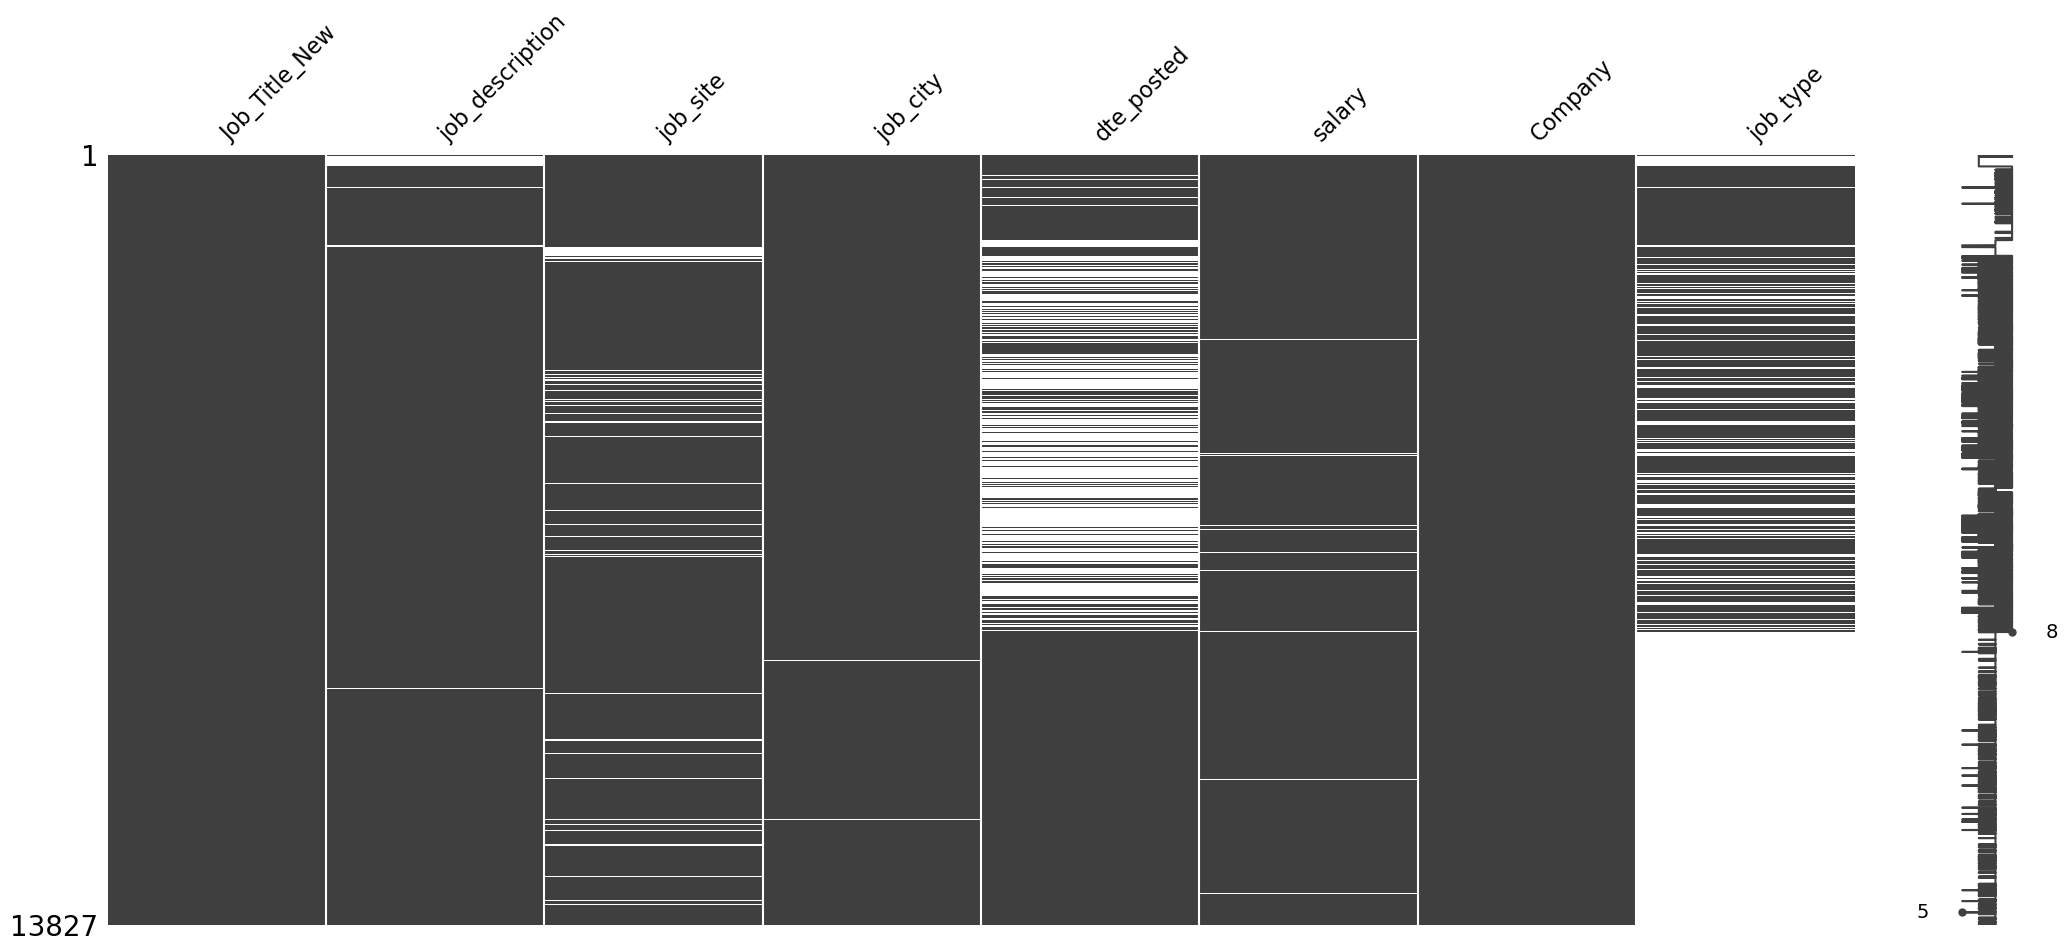

In [6]:
import missingno as msno
msno.matrix(df)

<AxesSubplot:>

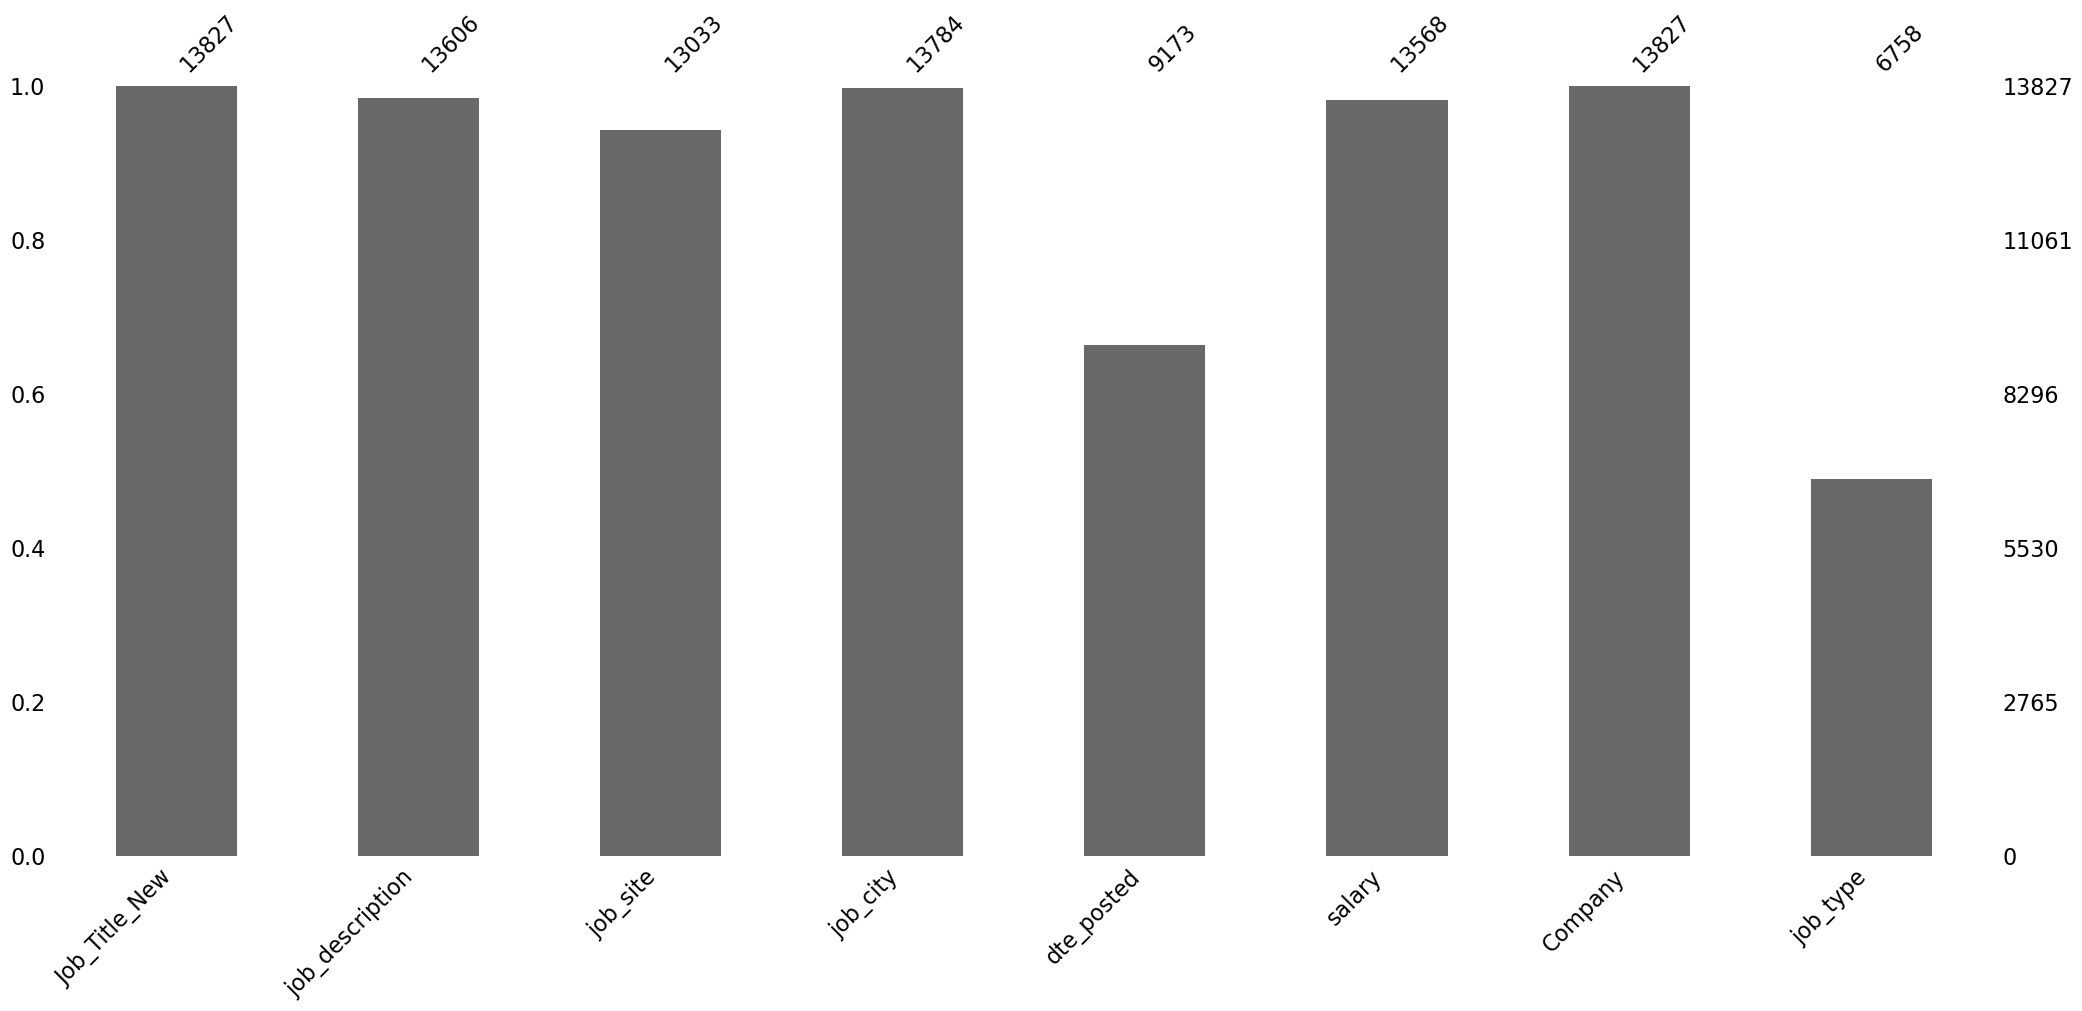

In [7]:
msno.bar(df)

<AxesSubplot:>

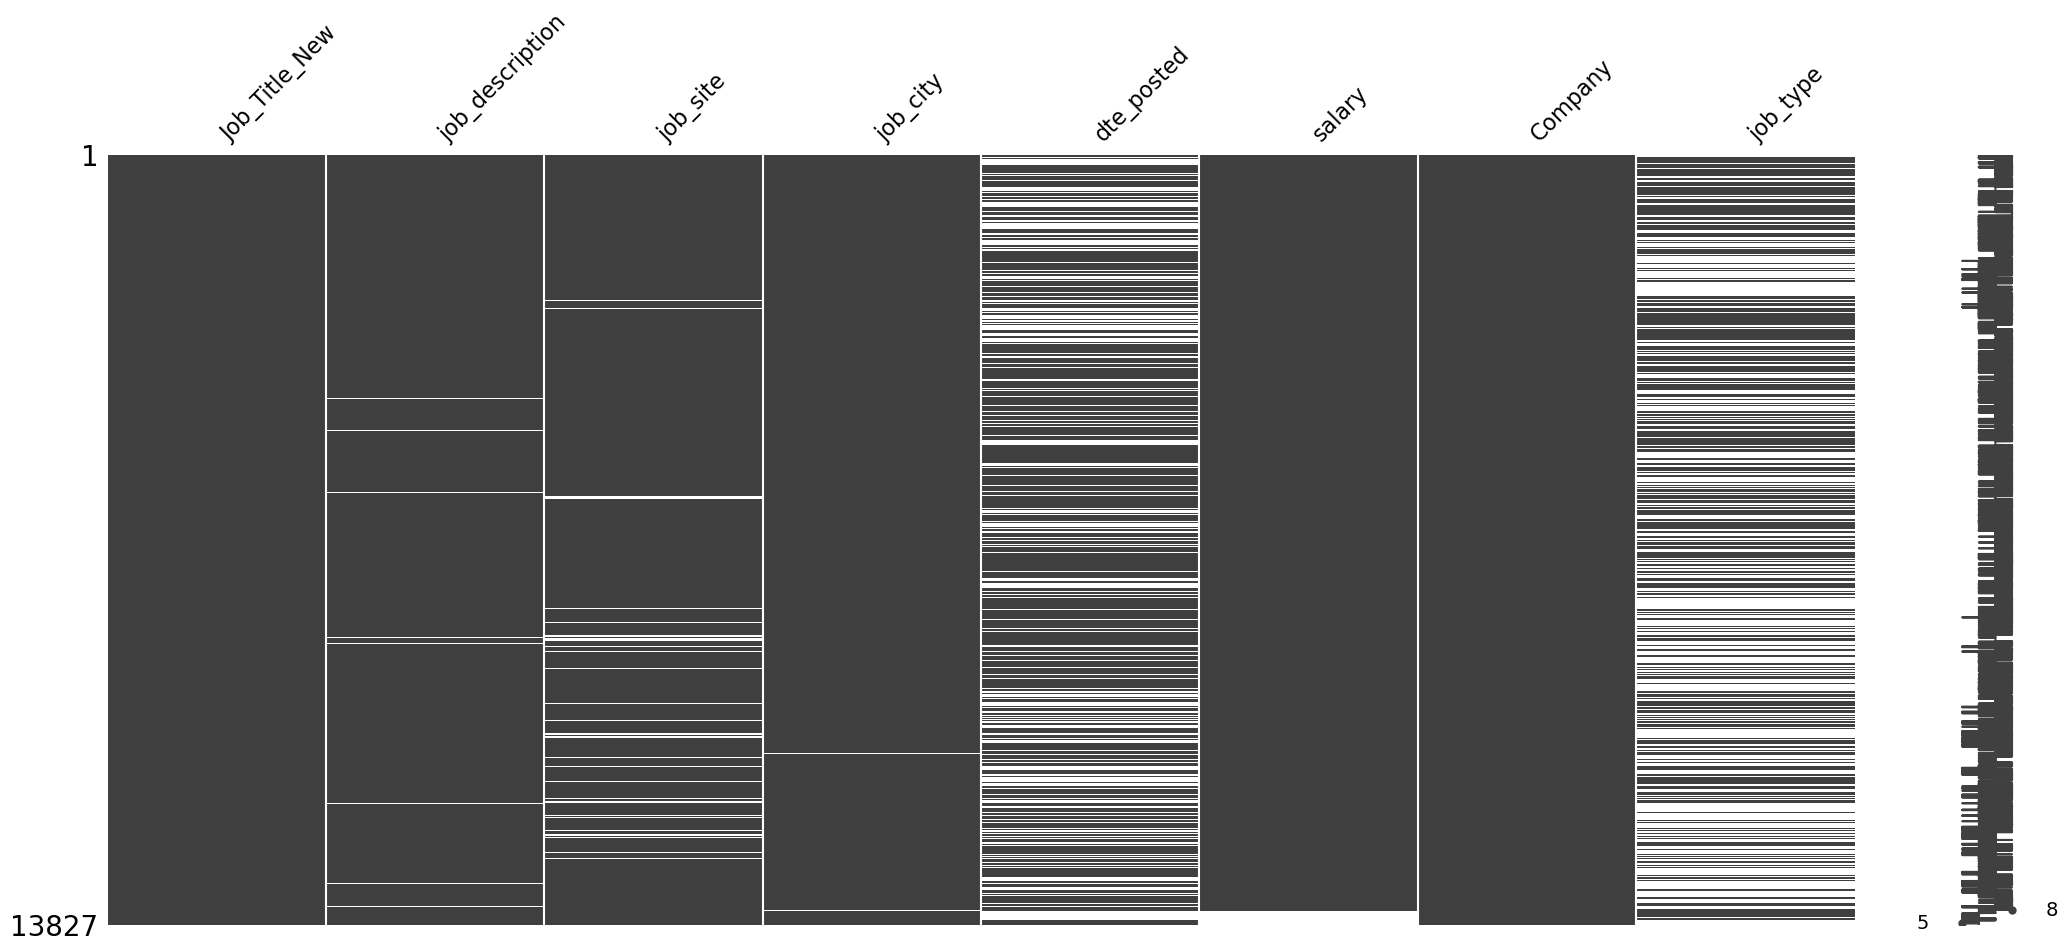

In [8]:
# sorting the salary column to check the pattern of missing values
sorted = df.sort_values('salary')
msno.matrix(sorted)

In [9]:
df['salary'].unique()

array([2.700000e+04, 8.000000e+04, 5.940000e+04, 4.000000e+04,
       5.500000e+04, 5.750000e+04, 4.500000e+04, 6.500000e+04,
       6.250000e+04, 1.950000e+05, 3.970000e+04, 4.750000e+04,
       7.000000e+04, 3.465000e+04, 5.000000e+04, 4.020600e+04,
       1.344050e+05, 8.250000e+04, 7.500000e+02, 9.250000e+04,
       3.660000e+04, 9.750000e+04, 4.118964e+04, 4.277600e+04,
       1.050000e+05, 2.167400e+04, 6.200000e+04, 3.334800e+04,
       4.566600e+04, 3.969000e+04, 2.400000e+04, 3.800000e+04,
       4.700000e+04, 7.153900e+04, 4.363100e+04, 3.300000e+04,
       4.300000e+04, 4.809000e+04, 7.100000e+04, 4.304000e+04,
       3.500000e+04, 3.185000e+04, 3.000000e+04, 3.200000e+04,
       2.850000e+04, 3.544500e+04, 2.167360e+04, 7.092700e+04,
       3.600000e+04, 4.900000e+04, 2.761500e+04, 3.420000e+04,
       5.320000e+04, 4.715900e+04, 6.629100e+04, 2.330000e+04,
       5.470400e+04, 4.161400e+04, 2.500000e+04, 3.685300e+04,
       1.150000e+05, 4.200000e+04, 2.821100e+04, 2.5303

In [10]:
# Define a function to convert salaries based on the number of digits, assuming two digit salary is hourly and 3 digit salary is weekly
def convert_based_on_digits(salary):
    if len(str(salary)) == 2:
        return salary * 2080  # Convert hourly to annual (assuming 2080 work hours, 8hrs/day, 5days/weeek)
    elif len(str(salary)) == 3:
        return salary * 52    # Convert weekly to annual (assuming 52 weeks)
    else:
        return salary

# Apply the conversion function to each row
df["New_salary"] = df["salary"].apply(convert_based_on_digits)

# Save the modified DataFrame to a new Excel file
#df.to_excel("converted_data.xlsx", index=True)  # Replace with desired output file name

df

Job_Title_New  \
0            Software/Developer   
1            Software/Developer   
2            Software/Developer   
3      Cyber Security/IT Expert   
4                  Data Analyst   
...                         ...   
13822       Senior/vp/team lead   
13823       Senior/vp/team lead   
13824       Senior/vp/team lead   
13825  Cyber Security/IT Expert   
13826    UI/UX/Digital Marketer   

                                         job_description    job_site  \
0      If you are looking to join a high tech industr...    linkedin   
1      If you are looking to join a high tech industr...    linkedin   
2      Lead C++ Games Developer | AAA Games | 90k | M...    linkedin   
3      Location: We operate a  working model and full...    linkedin   
4                                                    NaN  charityjob   
...                                                  ...         ...   
13822  Exciting step up role for someone with 2-3 yea...   totaljobs   
13823  Join a worldwide manufacturing company as a Pr...   totaljobs   
13824  This role will lead 3 Product Managers & 8 Pro...   totaljobs   
13825  Role: CRO Manager eCommerce * A pre-booked mee...   totaljobs   
13826  You will feed into the continuous development ...   totaljobs   

         job_city                     dte_posted    salary  \
0         Newtown       2023-08-11T22:23:27.000Z   27000.0   
1        Branston       2023-08-12T17:15:39.000Z   27000.0   
2             NaN       2023-08-09T16:16:25.000Z   80000.0   
3             NaN       2023-08-07T14:09:46.000Z   59400.0   
4          Remote  Posted 3 days ago Quick Apply   40000.0   
...           ...                            ...       ...   
13822      Exeter        2023-08-09T08:51:04.517   50000.0   
13823    Newhaven         2023-08-03T15:23:55.57   50000.0   
13824  Manchester        2023-08-04T09:56:56.653  150000.0   
13825      London        2023-07-27T16:21:45.477   45000.0   
13826       Leeds        2023-07-17T09:41:32.253   42000.0   

                              Company   job_type  New_salary  
0                        CareerAddict  Full-Time     27000.0  
1                  GSA Techsource Ltd  Full-Time     27000.0  
2                 Langham Recruitment  Full-Time     80000.0  
3      Office for National Statistics  Full-Time     59400.0  
4       Understanding Recruitment Ltd        NaN     40000.0  
...                               ...        ...         ...  
13822                     Set2Recruit        NaN     50000.0  
13823              Recruitment Genius        NaN     50000.0  
13824   Oscar Associates (UK) Limited        NaN    150000.0  
13825              Blue Pelican Group        NaN     45000.0  
13826                 WRK DIGITAL LTD        NaN     42000.0  

[13827 rows x 9 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13827 entries, 0 to 13826
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Job_Title_New    13827 non-null  object 
 1   job_description  13606 non-null  object 
 2   job_site         13033 non-null  object 
 3   job_city         13784 non-null  object 
 4   dte_posted       9173 non-null   object 
 5   salary           13568 non-null  float64
 6   Company          13827 non-null  object 
 7   job_type         6758 non-null   object 
 8   New_salary       13568 non-null  float64
dtypes: float64(2), object(7)
memory usage: 972.3+ KB


In [12]:
df.isnull().sum()

Job_Title_New         0
job_description     221
job_site            794
job_city             43
dte_posted         4654
salary              259
Company               0
job_type           7069
New_salary          259
dtype: int64

In [13]:
# Forward-fill missing values of job site
df['job_site'].fillna(method='ffill', inplace=True)
df['job_type'].fillna(method='ffill', inplace=True)

# Backward-fill any remaining missing values of job city
df['job_city'].fillna(method='bfill', inplace=True)

In [14]:
df.head()

Job_Title_New  \
0        Software/Developer   
1        Software/Developer   
2        Software/Developer   
3  Cyber Security/IT Expert   
4              Data Analyst   

                                     job_description    job_site  job_city  \
0  If you are looking to join a high tech industr...    linkedin   Newtown   
1  If you are looking to join a high tech industr...    linkedin  Branston   
2  Lead C++ Games Developer | AAA Games | 90k | M...    linkedin    Remote   
3  Location: We operate a  working model and full...    linkedin    Remote   
4                                                NaN  charityjob    Remote   

                      dte_posted   salary                         Company  \
0       2023-08-11T22:23:27.000Z  27000.0                    CareerAddict   
1       2023-08-12T17:15:39.000Z  27000.0              GSA Techsource Ltd   
2       2023-08-09T16:16:25.000Z  80000.0             Langham Recruitment   
3       2023-08-07T14:09:46.000Z  59400.0  Office for National Statistics   
4  Posted 3 days ago Quick Apply  40000.0   Understanding Recruitment Ltd   

    job_type  New_salary  
0  Full-Time     27000.0  
1  Full-Time     27000.0  
2  Full-Time     80000.0  
3  Full-Time     59400.0  
4  Full-Time     40000.0

In [15]:
df.isnull().sum()

Job_Title_New         0
job_description     221
job_site              0
job_city              0
dte_posted         4654
salary              259
Company               0
job_type              0
New_salary          259
dtype: int64

In [16]:
# using regression model to predict the missing values within the salary column

# encoding the categorical features
le = LabelEncoder()

# Create a copy of the original DataFrame df
data = df.copy()


data['Job_Title_New'] = le.fit_transform(data['Job_Title_New'])

data['job_site'] = le.fit_transform(data['job_site'])

data['job_city'] = le.fit_transform(data['job_city'])

data['Company'] = le.fit_transform(data['Company'])

data['job_type'] = le.fit_transform(data['job_type'])

data.head()

Job_Title_New                                    job_description  job_site  \
0             10  If you are looking to join a high tech industr...         5   
1             10  If you are looking to join a high tech industr...         5   
2             10  Lead C++ Games Developer | AAA Games | 90k | M...         5   
3              2  Location: We operate a  working model and full...         5   
4              3                                                NaN         0   

   job_city                     dte_posted   salary  Company  job_type  \
0       953       2023-08-11T22:23:27.000Z  27000.0      408         1   
1       363       2023-08-12T17:15:39.000Z  27000.0      880         1   
2      1039       2023-08-09T16:16:25.000Z  80000.0     1268         1   
3      1039       2023-08-07T14:09:46.000Z  59400.0     1603         1   
4      1039  Posted 3 days ago Quick Apply  40000.0     2384         1   

   New_salary  
0     27000.0  
1     27000.0  
2     80000.0  
3     59400.0  
4     40000.0

In [17]:
# Split the data into training (with known salaries) and test (with missing salaries)
train_data = data.dropna(subset=['New_salary'])
test_data = data[data['New_salary'].isnull()]

# Select relevant features and target variable
features = ['Job_Title_New', 'job_site', 'job_city', 'Company']  # Modify this based on your dataset
X_train = train_data[features]
y_train = train_data['New_salary']
X_test = test_data[features]

# Create and train a regression model (linear regression in this example)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Predict missing salaries
predicted_salaries = regression_model.predict(X_test)

# Impute the missing salaries in the original dataset
data.loc[data['New_salary'].isnull(), 'New_salary'] = predicted_salaries

In [18]:
data.isnull().sum()

Job_Title_New         0
job_description     221
job_site              0
job_city              0
dte_posted         4654
salary              259
Company               0
job_type              0
New_salary            0
dtype: int64

In [19]:
data.head()

Job_Title_New                                    job_description  job_site  \
0             10  If you are looking to join a high tech industr...         5   
1             10  If you are looking to join a high tech industr...         5   
2             10  Lead C++ Games Developer | AAA Games | 90k | M...         5   
3              2  Location: We operate a  working model and full...         5   
4              3                                                NaN         0   

   job_city                     dte_posted   salary  Company  job_type  \
0       953       2023-08-11T22:23:27.000Z  27000.0      408         1   
1       363       2023-08-12T17:15:39.000Z  27000.0      880         1   
2      1039       2023-08-09T16:16:25.000Z  80000.0     1268         1   
3      1039       2023-08-07T14:09:46.000Z  59400.0     1603         1   
4      1039  Posted 3 days ago Quick Apply  40000.0     2384         1   

   New_salary  
0     27000.0  
1     27000.0  
2     80000.0  
3     59400.0  
4     40000.0

In [20]:
# Rename the New Salary Column
data.rename(columns={'New_salary': 'Salaries'}, inplace=True)

In [21]:
# from the original data(df)

df.head()

Job_Title_New  \
0        Software/Developer   
1        Software/Developer   
2        Software/Developer   
3  Cyber Security/IT Expert   
4              Data Analyst   

                                     job_description    job_site  job_city  \
0  If you are looking to join a high tech industr...    linkedin   Newtown   
1  If you are looking to join a high tech industr...    linkedin  Branston   
2  Lead C++ Games Developer | AAA Games | 90k | M...    linkedin    Remote   
3  Location: We operate a  working model and full...    linkedin    Remote   
4                                                NaN  charityjob    Remote   

                      dte_posted   salary                         Company  \
0       2023-08-11T22:23:27.000Z  27000.0                    CareerAddict   
1       2023-08-12T17:15:39.000Z  27000.0              GSA Techsource Ltd   
2       2023-08-09T16:16:25.000Z  80000.0             Langham Recruitment   
3       2023-08-07T14:09:46.000Z  59400.0  Office for National Statistics   
4  Posted 3 days ago Quick Apply  40000.0   Understanding Recruitment Ltd   

    job_type  New_salary  
0  Full-Time     27000.0  
1  Full-Time     27000.0  
2  Full-Time     80000.0  
3  Full-Time     59400.0  
4  Full-Time     40000.0

In [22]:
# taking the Salaries column for the data dataframe and merge with the df dataframe

merged_df = pd.concat([df, data['Salaries']], axis=1)

merged_df.head()

Job_Title_New  \
0        Software/Developer   
1        Software/Developer   
2        Software/Developer   
3  Cyber Security/IT Expert   
4              Data Analyst   

                                     job_description    job_site  job_city  \
0  If you are looking to join a high tech industr...    linkedin   Newtown   
1  If you are looking to join a high tech industr...    linkedin  Branston   
2  Lead C++ Games Developer | AAA Games | 90k | M...    linkedin    Remote   
3  Location: We operate a  working model and full...    linkedin    Remote   
4                                                NaN  charityjob    Remote   

                      dte_posted   salary                         Company  \
0       2023-08-11T22:23:27.000Z  27000.0                    CareerAddict   
1       2023-08-12T17:15:39.000Z  27000.0              GSA Techsource Ltd   
2       2023-08-09T16:16:25.000Z  80000.0             Langham Recruitment   
3       2023-08-07T14:09:46.000Z  59400.0  Office for National Statistics   
4  Posted 3 days ago Quick Apply  40000.0   Understanding Recruitment Ltd   

    job_type  New_salary  Salaries  
0  Full-Time     27000.0   27000.0  
1  Full-Time     27000.0   27000.0  
2  Full-Time     80000.0   80000.0  
3  Full-Time     59400.0   59400.0  
4  Full-Time     40000.0   40000.0

In [23]:
merged_df.isnull().sum()

Job_Title_New         0
job_description     221
job_site              0
job_city              0
dte_posted         4654
salary              259
Company               0
job_type              0
New_salary          259
Salaries              0
dtype: int64

In [24]:
# dropping columns not necessary for the analysis

merged_df.drop(['dte_posted','salary','New_salary'], axis=1, inplace=True)

merged_df.head()

Job_Title_New  \
0        Software/Developer   
1        Software/Developer   
2        Software/Developer   
3  Cyber Security/IT Expert   
4              Data Analyst   

                                     job_description    job_site  job_city  \
0  If you are looking to join a high tech industr...    linkedin   Newtown   
1  If you are looking to join a high tech industr...    linkedin  Branston   
2  Lead C++ Games Developer | AAA Games | 90k | M...    linkedin    Remote   
3  Location: We operate a  working model and full...    linkedin    Remote   
4                                                NaN  charityjob    Remote   

                          Company   job_type  Salaries  
0                    CareerAddict  Full-Time   27000.0  
1              GSA Techsource Ltd  Full-Time   27000.0  
2             Langham Recruitment  Full-Time   80000.0  
3  Office for National Statistics  Full-Time   59400.0  
4   Understanding Recruitment Ltd  Full-Time   40000.0

In [25]:
merged_df.isnull().sum()

Job_Title_New        0
job_description    221
job_site             0
job_city             0
Company              0
job_type             0
Salaries             0
dtype: int64

## EDA

In [26]:
# number of unique job titles
merged_df['Job_Title_New'].nunique()

12

In [27]:
# number of unique job types
merged_df['job_type'].nunique()

4

In [28]:
# number of unique job site
merged_df['job_site'].nunique()

11

In [29]:
# number of unique company
merged_df['Company'].nunique()

2621

In [30]:
# number of unique job city
merged_df['job_city'].nunique()

1364

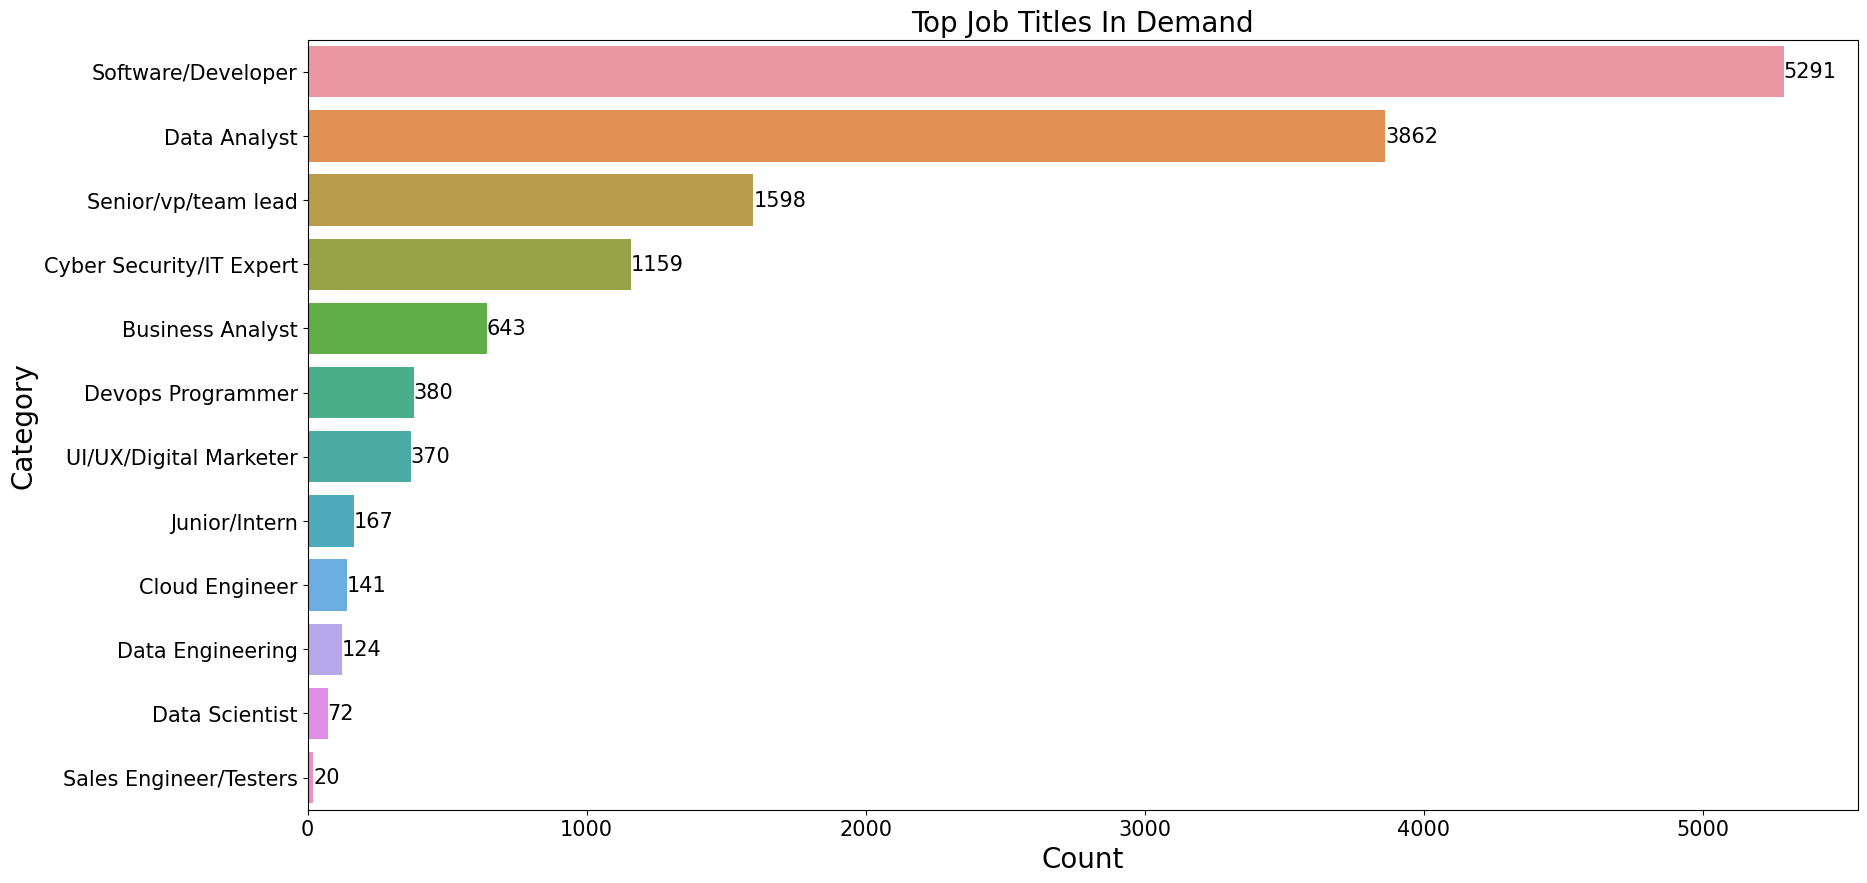

In [31]:
# frequency of job titles

# Calculate the counts of each job title
category_counts = merged_df['Job_Title_New'].value_counts().head(12)

# Create a DataFrame with the job title and their counts
job_title_categories = pd.DataFrame({'Job_Title_New': category_counts.index, 'Count': category_counts.values})

# Plot the countplot using seaborn
plt.figure(figsize=(20,10))
sns.barplot(data=job_title_categories, y='Job_Title_New', x='Count')
plt.ylabel('Category', size=20)
plt.yticks(fontsize=15, rotation=0, ha='right')
plt.xlabel('Count', size=20)
plt.xticks(fontsize=15, rotation=0, ha='center')
plt.title('Top Job Titles In Demand', size=20)

# Add tooltips to the bars
for i, count in enumerate(job_title_categories['Count']):
    plt.text(count, i, str(count), va='center', fontsize=15)


plt.show()

#### Insight

- Software developers are in high demand compared to other job titles

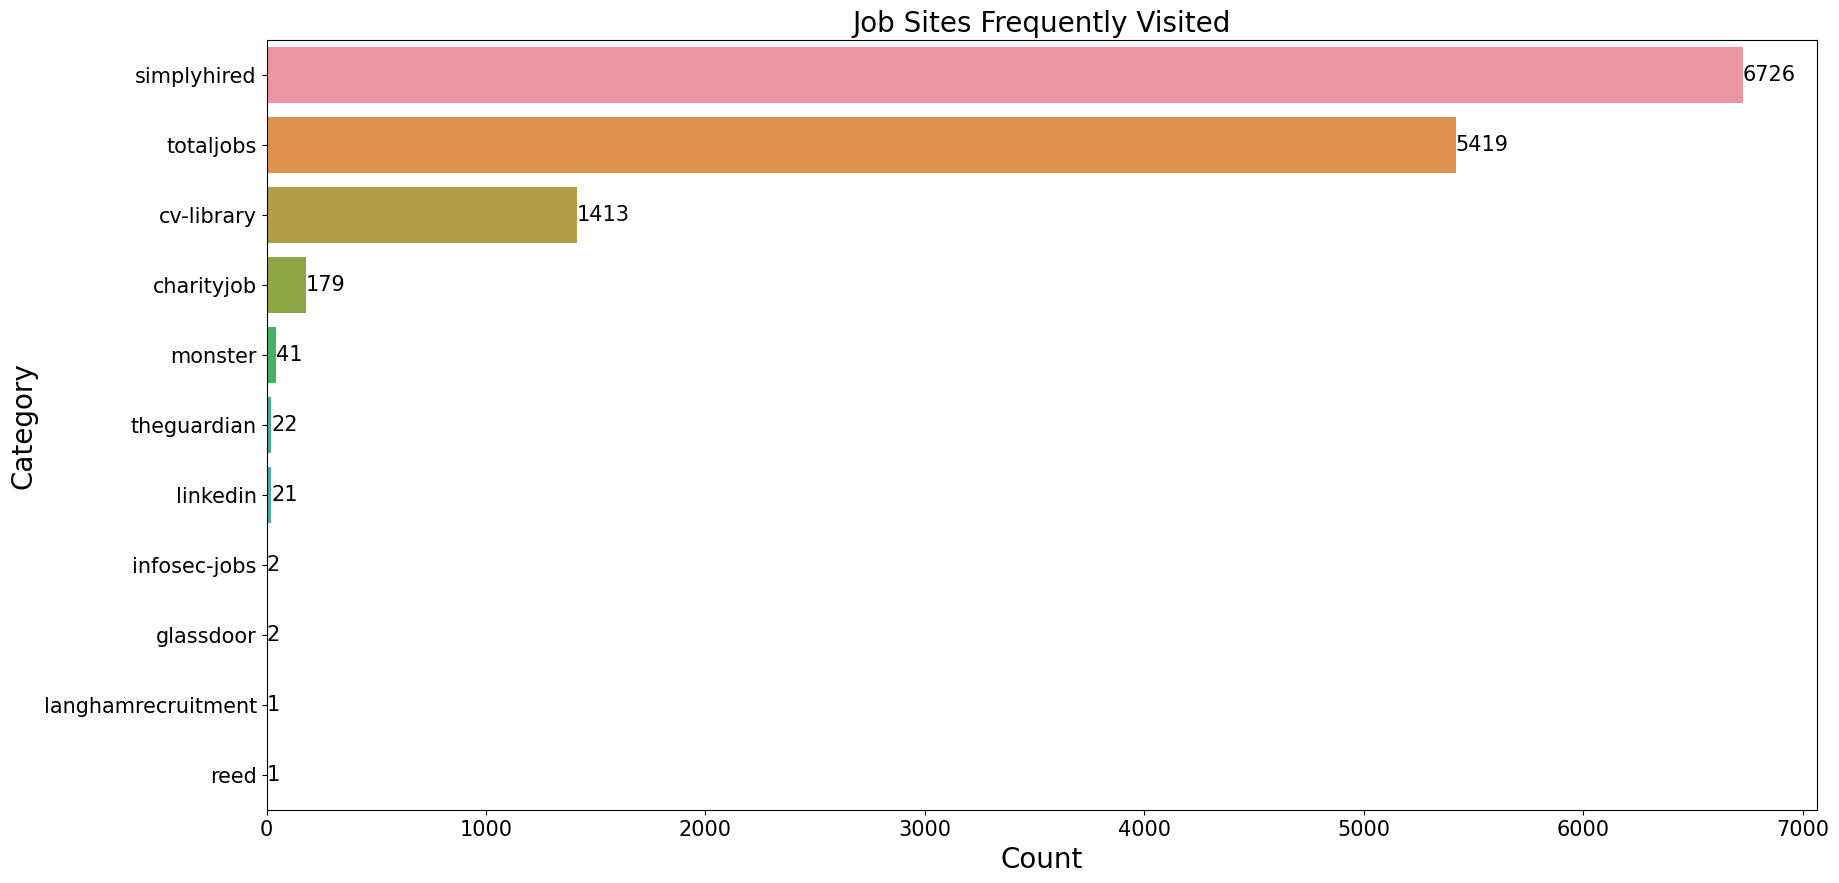

In [32]:
# frequency of job sites

# Calculate the counts of each category
site_counts = merged_df['job_site'].value_counts().head(11)

# Create a DataFrame with the top 10 categories and their counts
job_site_categories = pd.DataFrame({'job_site':site_counts.index, 'Count': site_counts.values})

# Plot the countplot using seaborn
plt.figure(figsize=(20,10))
sns.barplot(data=job_site_categories, y='job_site', x='Count')
plt.ylabel('Category', size=20)
plt.yticks(fontsize=15, rotation=0, ha='right')
plt.xlabel('Count', size=20)
plt.xticks(fontsize=15, rotation=0, ha='center')
plt.title('Job Sites Frequently Visited', size=20)

# Add tooltips to the bars
for i, count in enumerate(job_site_categories['Count']):
    plt.text(count, i, str(count), va='center', fontsize=15)



plt.show()

#### Insights

- Simplyhired is a jobsite that has the highest frequency for tech job search.

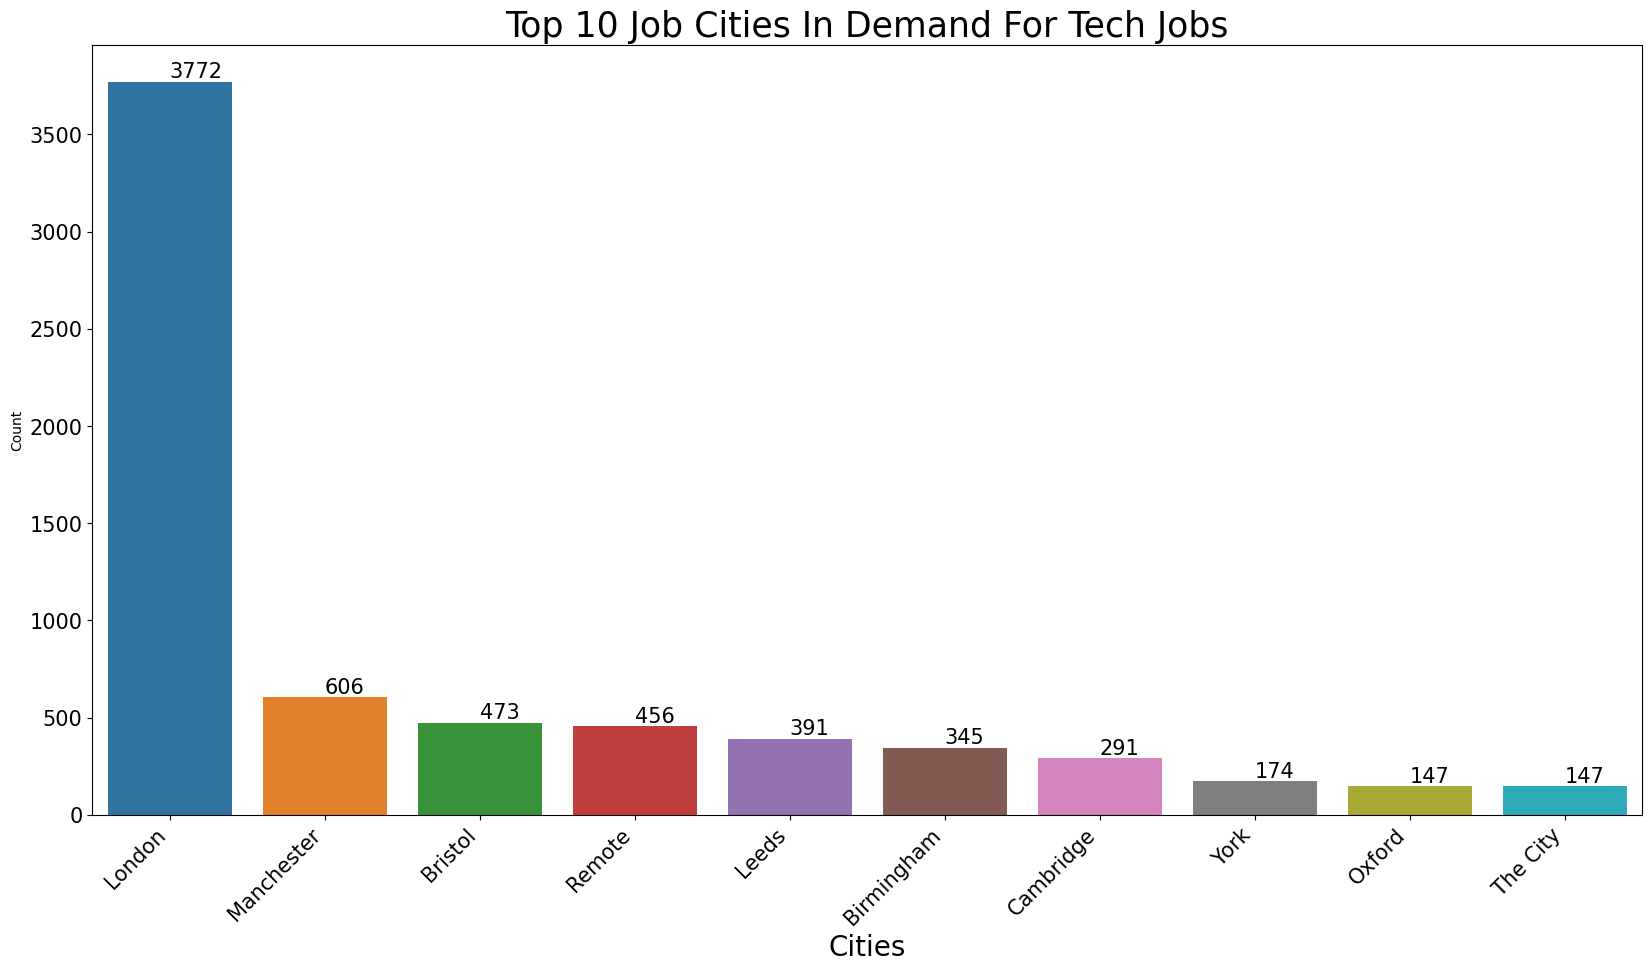

In [33]:
#analyzing job cities

# Calculate the top 10 counts of the job city
city_counts = merged_df['job_city'].value_counts().head(10)

# Create a DataFrame with the top 10 categories and their counts
city = pd.DataFrame({'job_city': city_counts.index, 'Count': city_counts.values})

# Plot the countplot using seaborn
plt.figure(figsize=(20,10))
sns.barplot(data=city, x='job_city', y='Count')
plt.xlabel("Cities", size =20 )
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.ylabel('Count')
plt.yticks(fontsize=15)
plt.title("Top 10 Job Cities In Demand For Tech Jobs", size=25)

# Add tooltips to the bars
for i, count in enumerate(city['Count']):
    plt.text(i, count, str(count), va='bottom', fontsize=15)

plt.show()

#### Insights
- London is the city with the highest demand for tech jobs in the United Kingdom. It has 3,772 job listings.

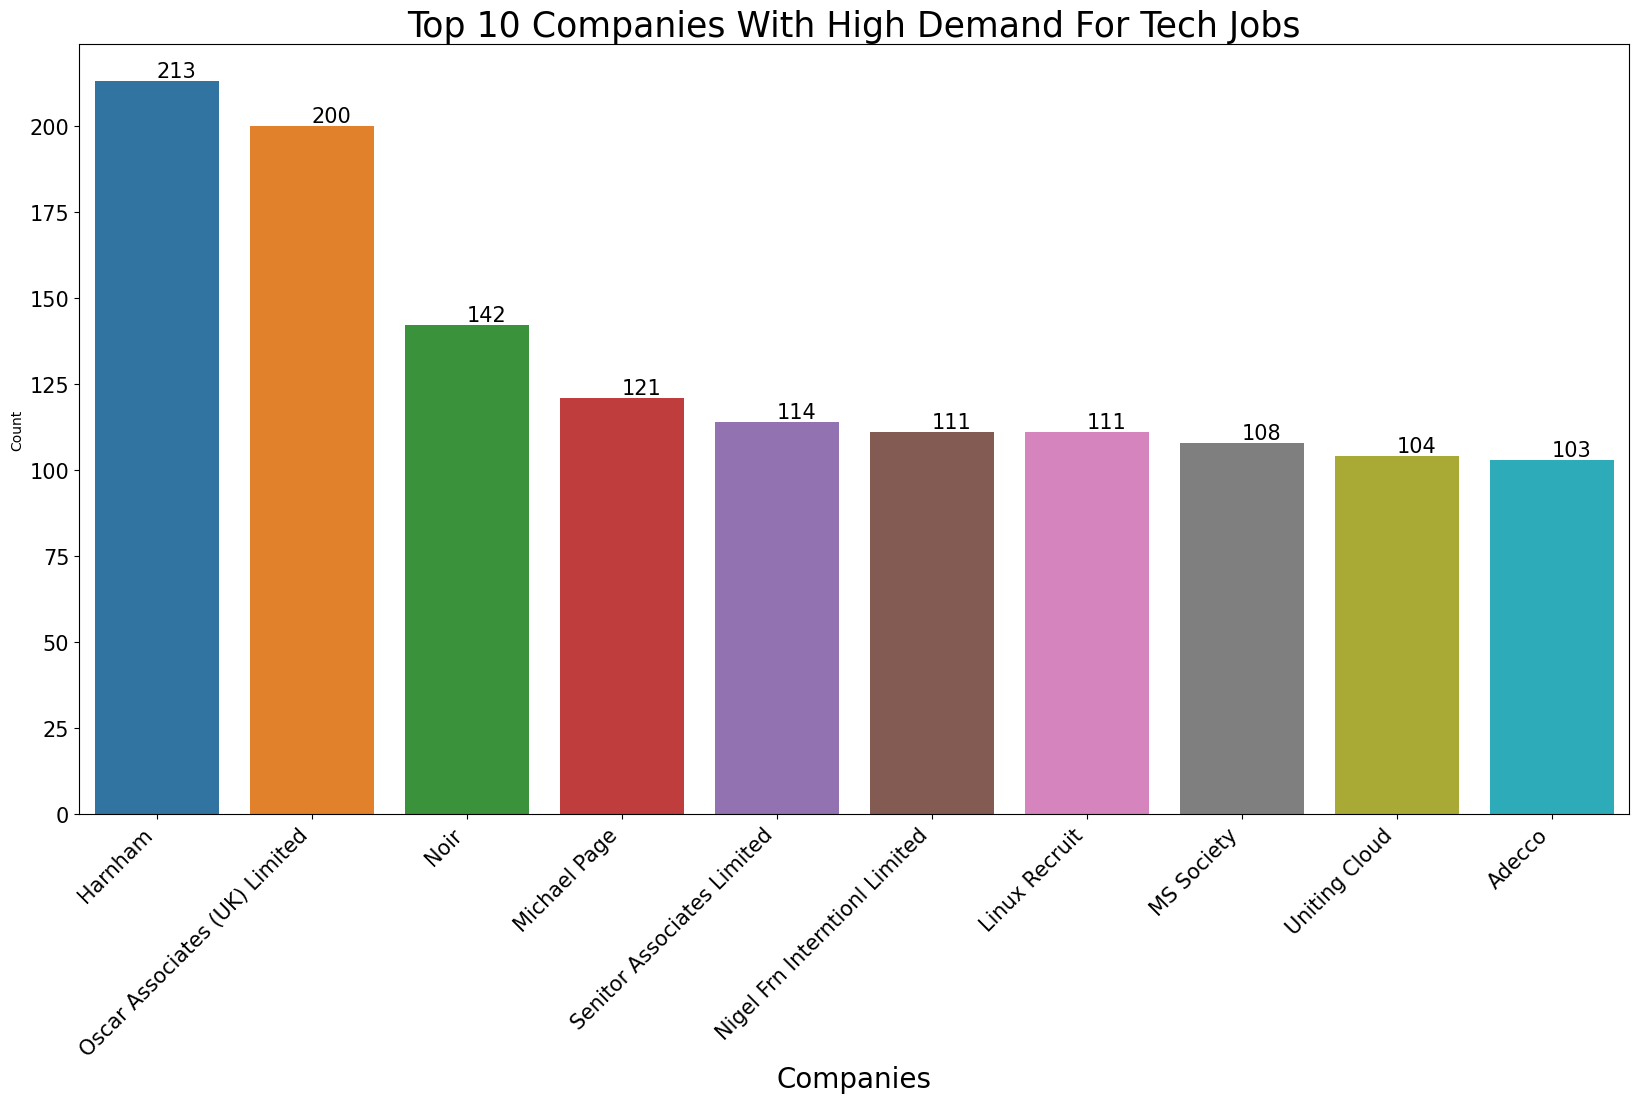

In [34]:
#analyzing the companies

# Calculate the top 10 counts of the Company
company_counts = merged_df['Company'].value_counts().head(10)

# Create a DataFrame with the top 10 categories and their counts
comp = pd.DataFrame({'Company': company_counts.index, 'Count': company_counts.values})

# Plot the countplot using seaborn
plt.figure(figsize=(20,10))
sns.barplot(data=comp, x='Company', y='Count')
plt.xlabel("Companies", size =20 )
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.ylabel('Count')
plt.yticks(fontsize=15)
plt.title("Top 10 Companies With High Demand For Tech Jobs", size=25)

# Add tooltips to the bars
for i, count in enumerate(comp['Count']):
    plt.text(i, count, str(count), va='bottom', fontsize=15)

plt.show()

#### Insights
- In the UK, Harnham is the company with the most demand for tech jobs, with 213 job listings.

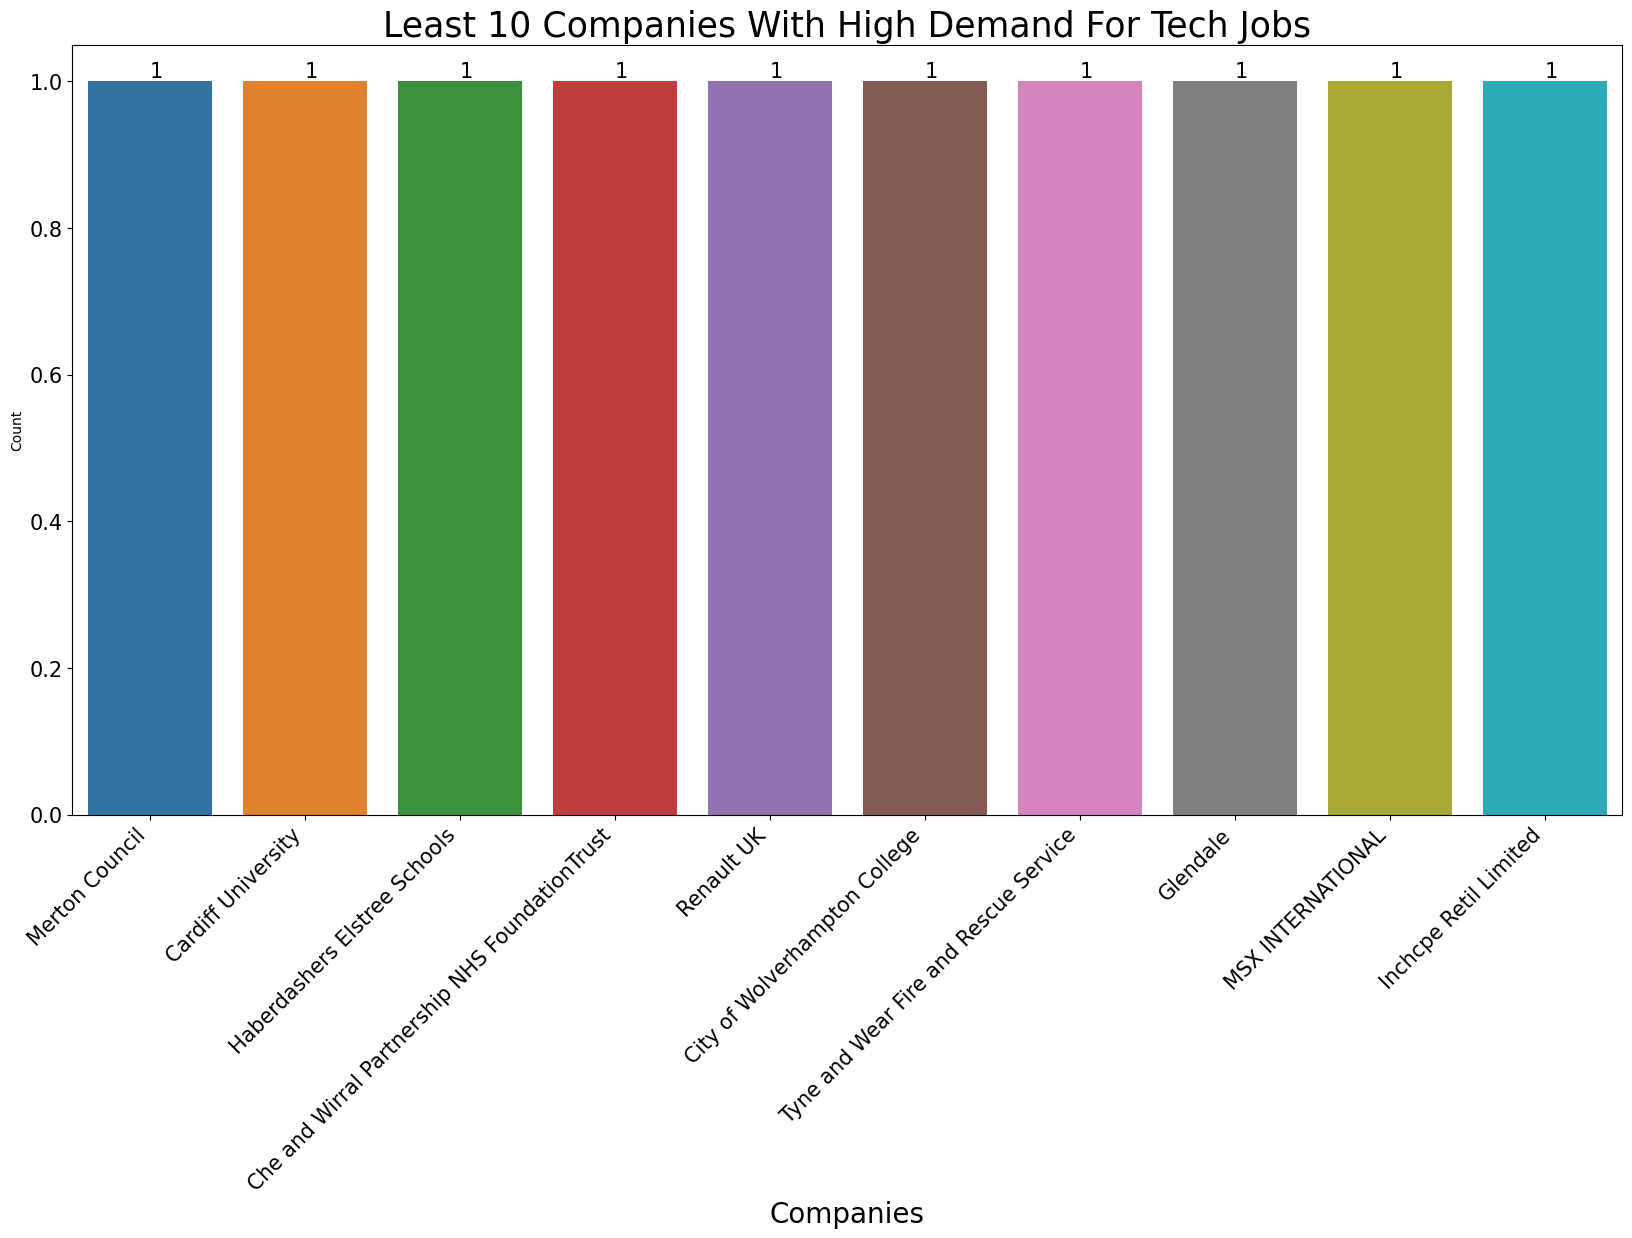

In [35]:
#analyzing the companies

# Calculate the least 10 counts of the Company
company_counts = merged_df['Company'].value_counts().tail(10)

# Create a DataFrame with the top 10 categories and their counts
comp = pd.DataFrame({'Company': company_counts.index, 'Count': company_counts.values})

# Plot the countplot using seaborn
plt.figure(figsize=(20,10))
sns.barplot(data=comp, x='Company', y='Count')
plt.xlabel("Companies", size =20 )
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.ylabel('Count')
plt.yticks(fontsize=15)
plt.title("Least 10 Companies With High Demand For Tech Jobs", size=25)

# Add tooltips to the bars
for i, count in enumerate(comp['Count']):
    plt.text(i, count, str(count), va='bottom', fontsize=15)

plt.show()

In [36]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


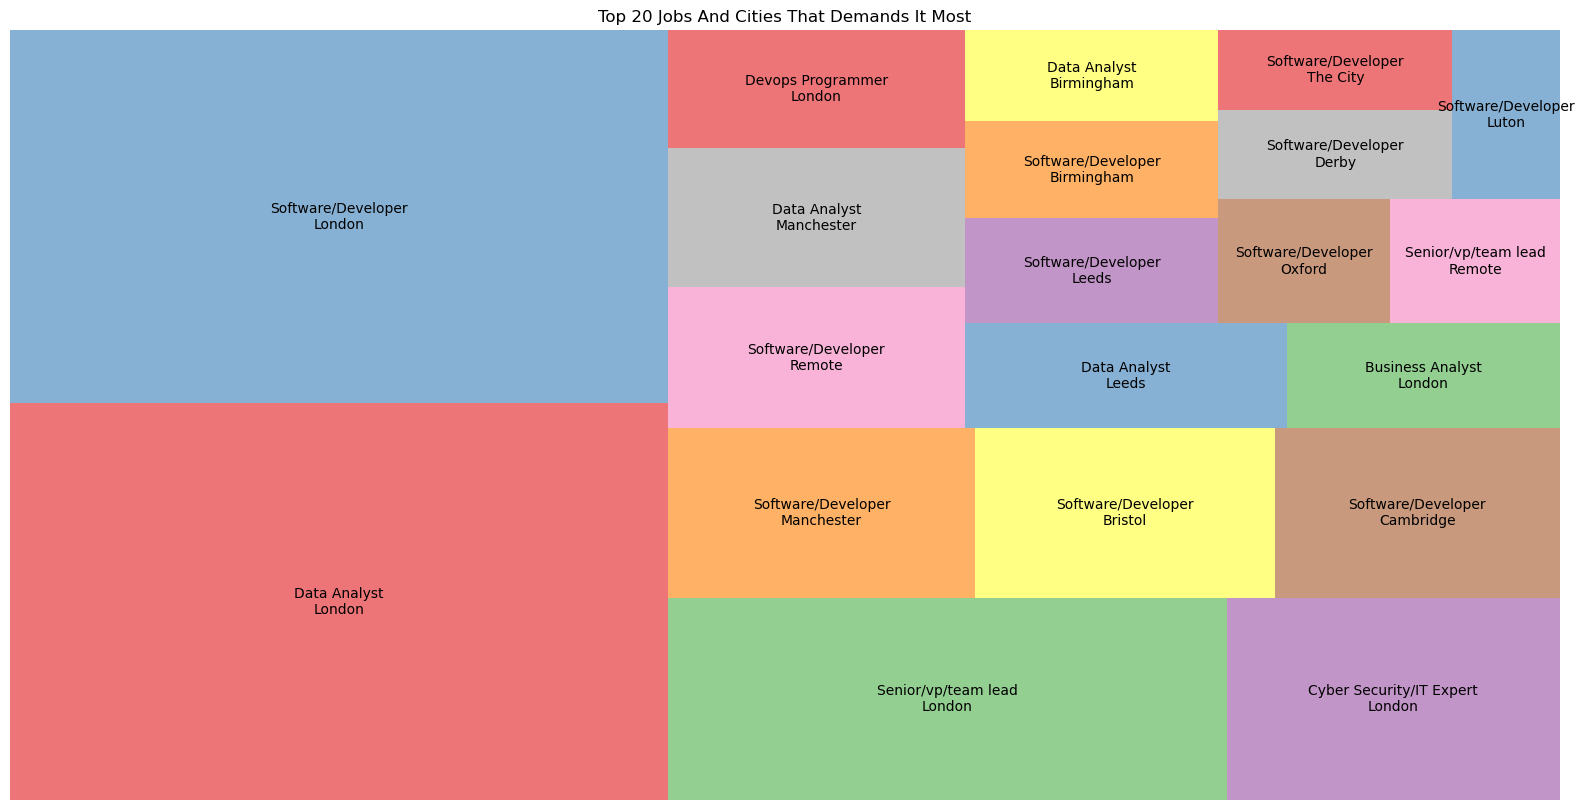

In [37]:
# Calculate the count of combinations of job_city and Job_Title_New
agg_data = merged_df.groupby(['Job_Title_New', 'job_city']).size().reset_index(name='Count')

# Sort the data by count in descending order and select the top 10
top_n = 20
agg_data = agg_data.sort_values(by='Count', ascending=False).head(top_n)

# Create the treemap for the top N combinations
plt.figure(figsize=(20, 10))
sizes = agg_data['Count']
label = agg_data['Job_Title_New'] + '\n' + agg_data['job_city']
color = sns.color_palette("Set1", n_colors=len(sizes))

squarify.plot(sizes=sizes, label=label, alpha=0.6, color=color)
plt.title(f'Top {top_n} Jobs And Cities That Demands It Most')
plt.axis('off')
plt.show()


#### Insight
- The chart above shows that software developers are in demand in more cities, followed by data analyst, while sales engineers are least demanded accross all the cities

In [38]:
# Group the data by 'Job_Title' and 'Job_City' and count the occurrences
job_city_counts = df.groupby(['Job_Title_New', 'job_city']).size().reset_index(name='Count')

# Sort the data within each job title group by count in descending order
job_city_counts['Rank'] = job_city_counts.groupby('Job_Title_New')['Count'].rank(ascending=False, method='first')

# Filter to get the top 10 cities for each job title
top_cities_by_job_title = job_city_counts[job_city_counts['Rank'] <= 10]

# Print or export the resulting DataFrame
print(top_cities_by_job_title)


               Job_Title_New       job_city  Count  Rank
83          Business Analyst     Birmingham     24   3.0
90          Business Analyst        Bristol     11   7.0
97          Business Analyst      Cambridge      9   8.0
133         Business Analyst        Glasgow      7  10.0
159         Business Analyst          Leeds     17   4.0
...                      ...            ...    ...   ...
2415  UI/UX/Digital Marketer     Manchester     27   2.0
2417  UI/UX/Digital Marketer  Milton Keynes      7   8.0
2424  UI/UX/Digital Marketer     Nottingham      5  10.0
2450  UI/UX/Digital Marketer         Surrey      7   9.0
2460  UI/UX/Digital Marketer        Warwick     16   3.0

[120 rows x 4 columns]


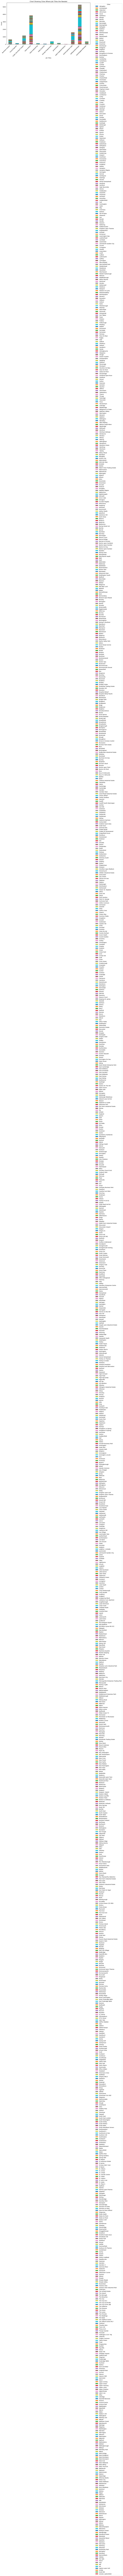

In [39]:
# Group the data and calculate the count of each job title within each city
grouped_data = merged_df.groupby(['Job_Title_New','job_city']).size().unstack(fill_value=0)

# Create a grouped bar plot
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Chart Showing Cities Where Job Titles Are Needed')
plt.xlabel('Job Titles')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cities', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


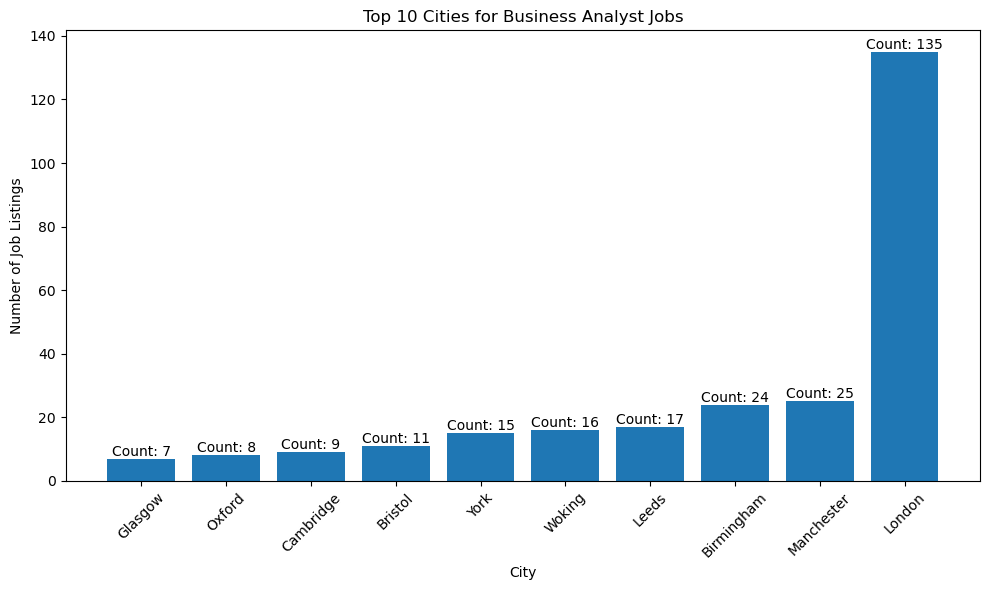

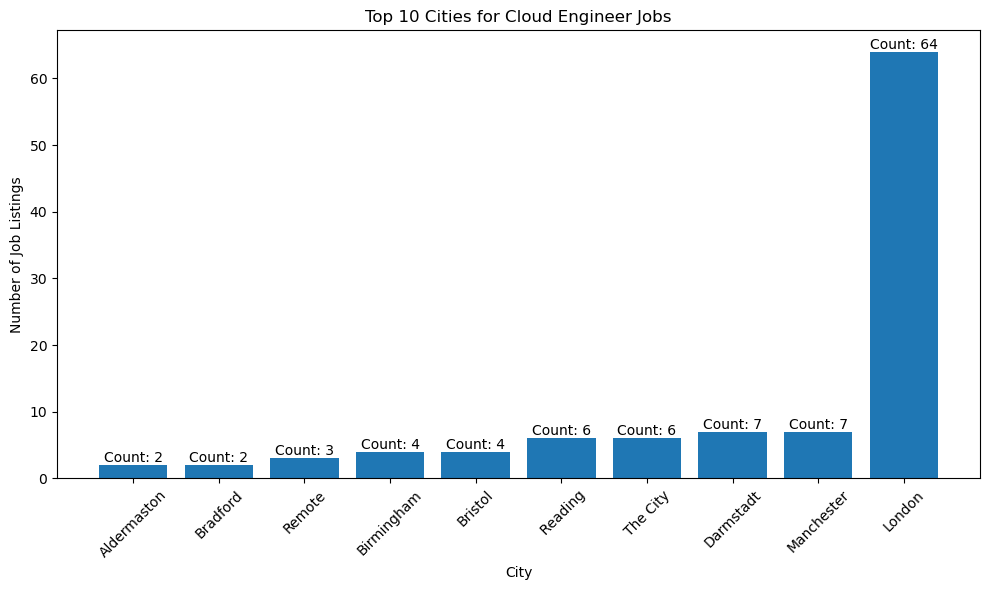

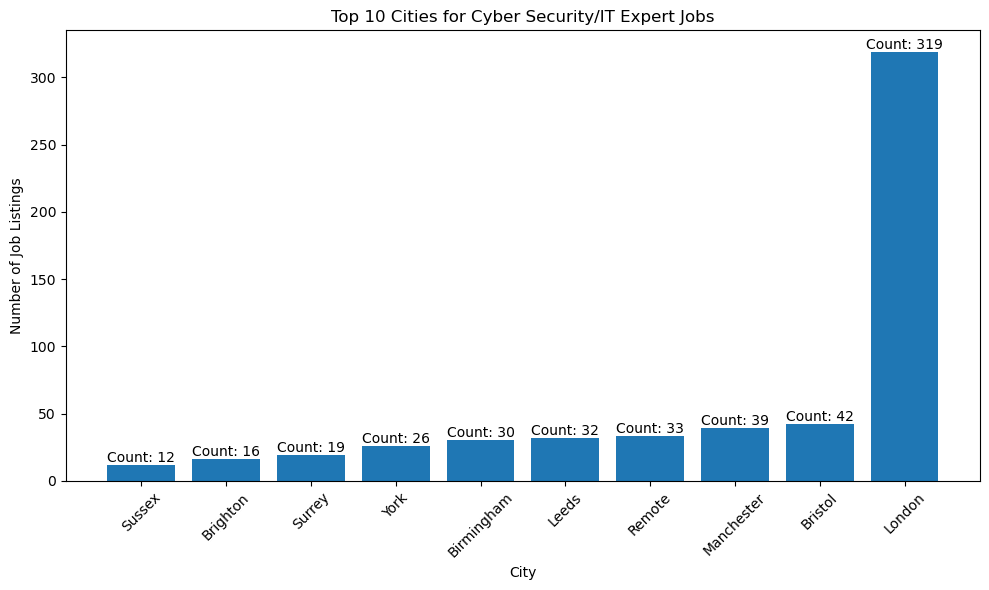

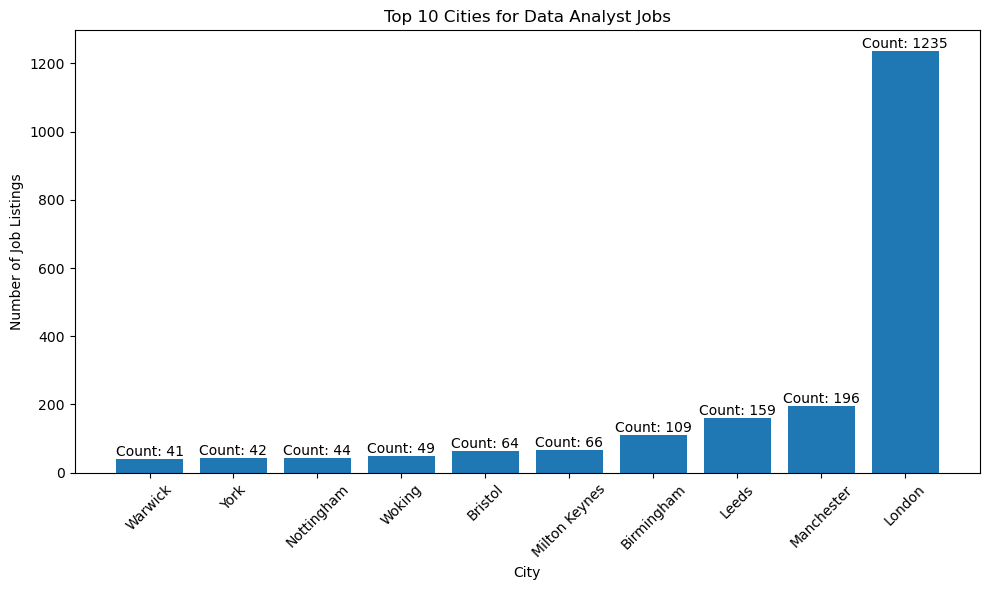

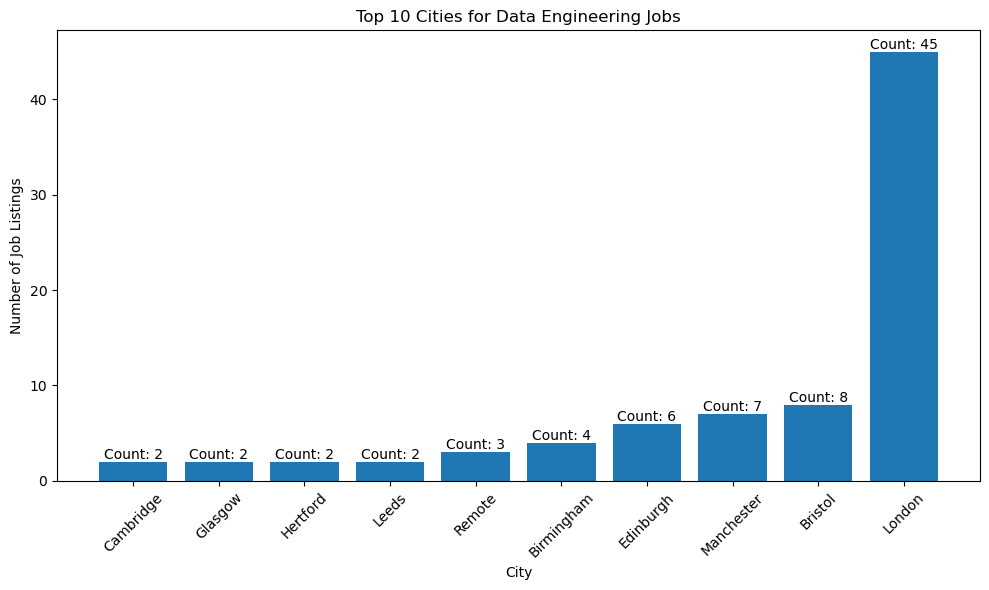

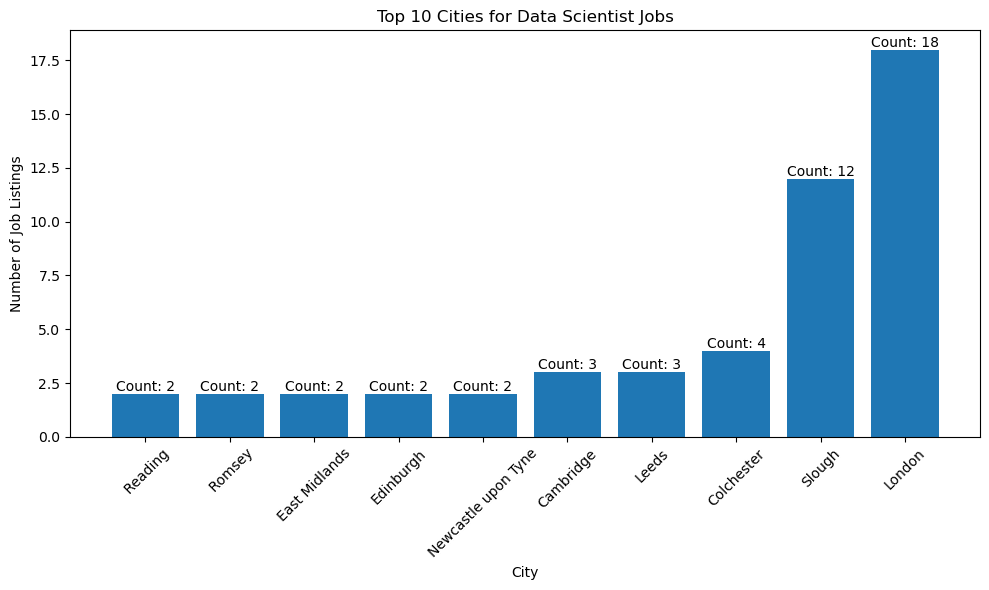

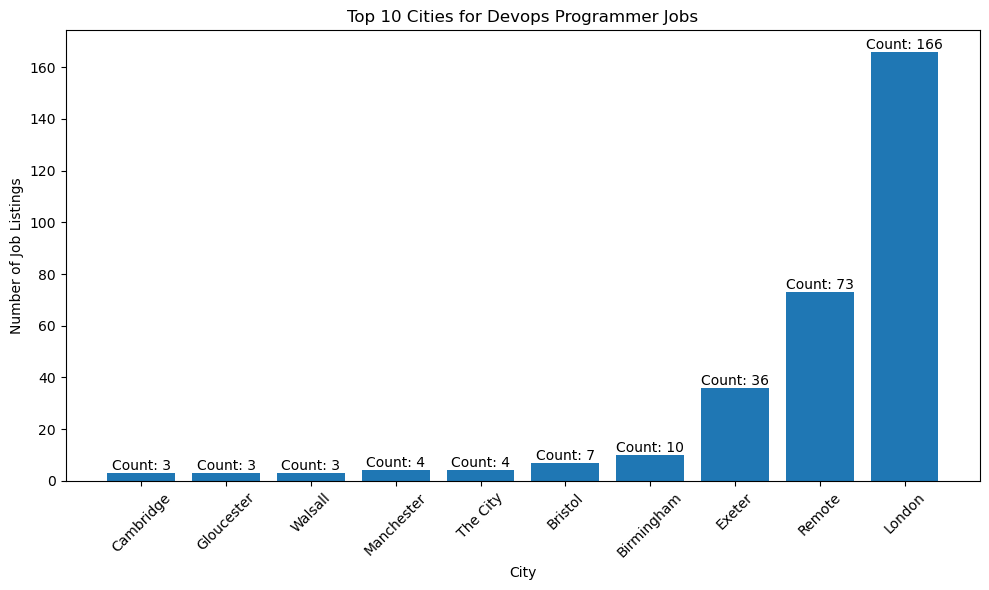

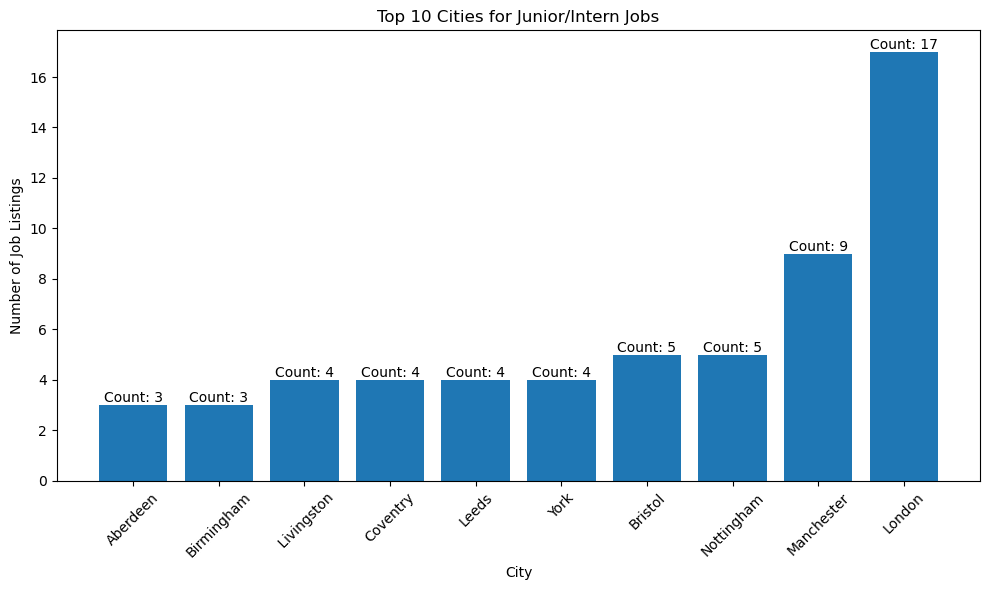

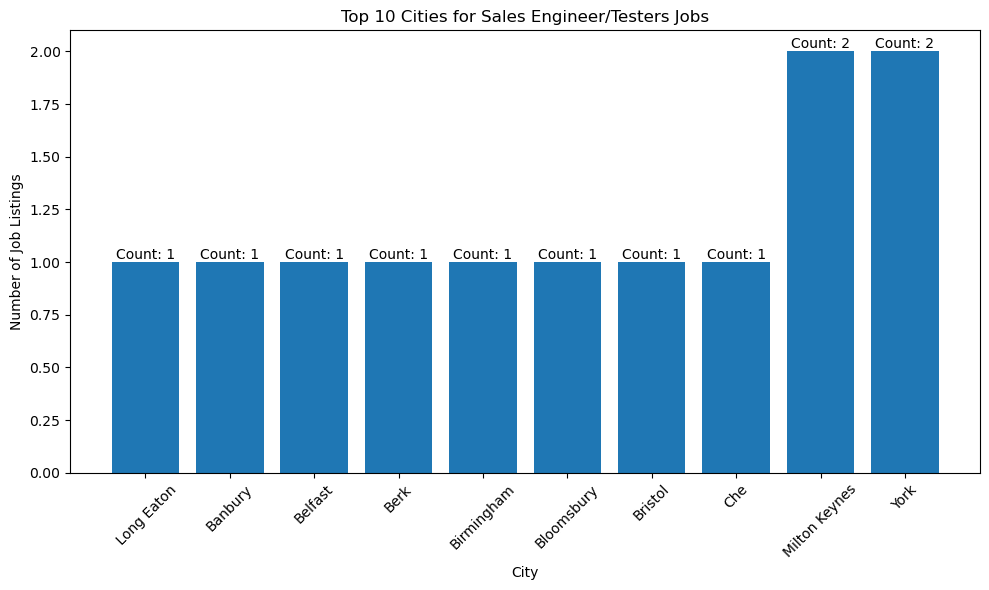

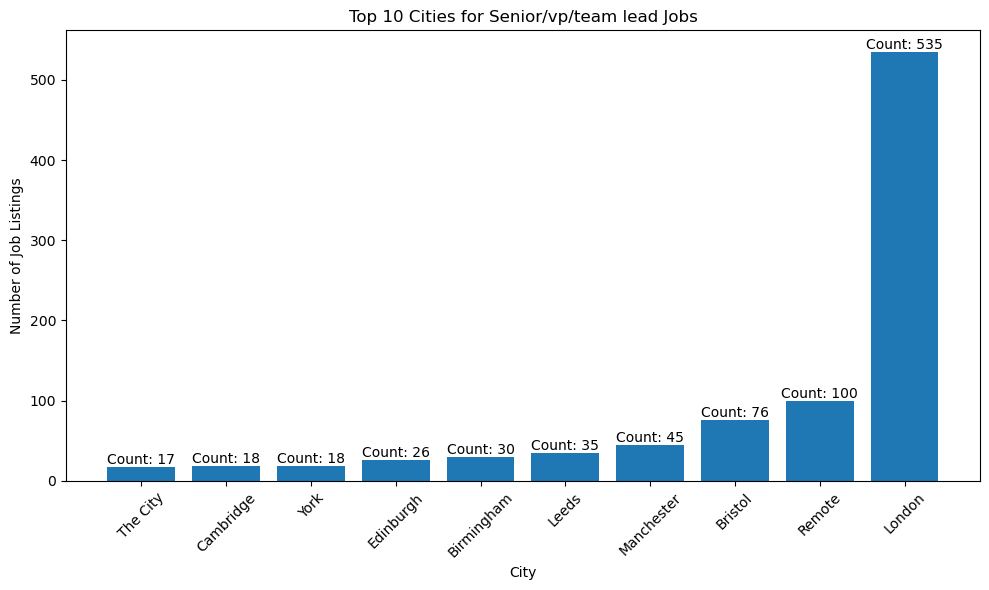

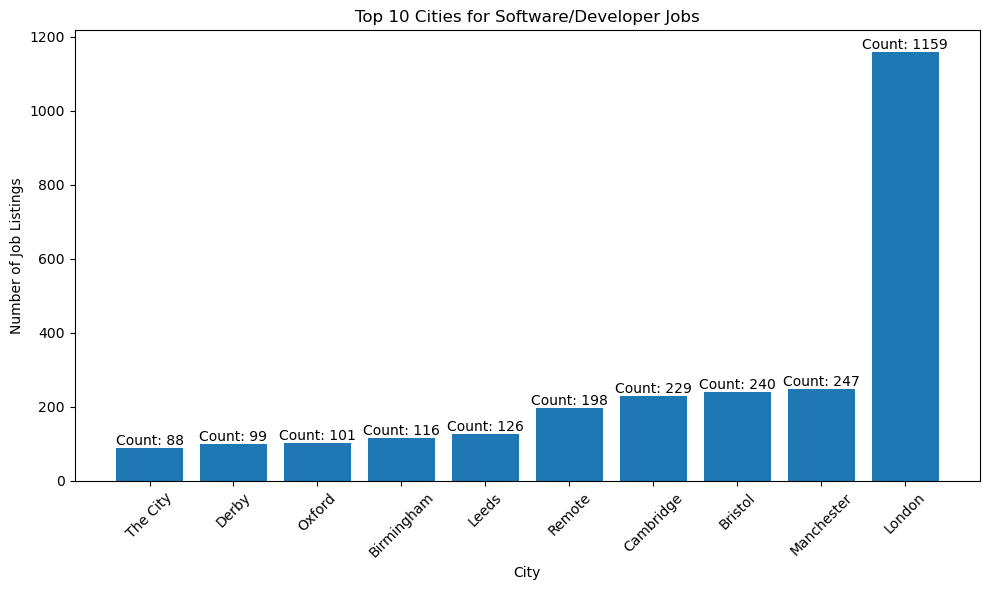

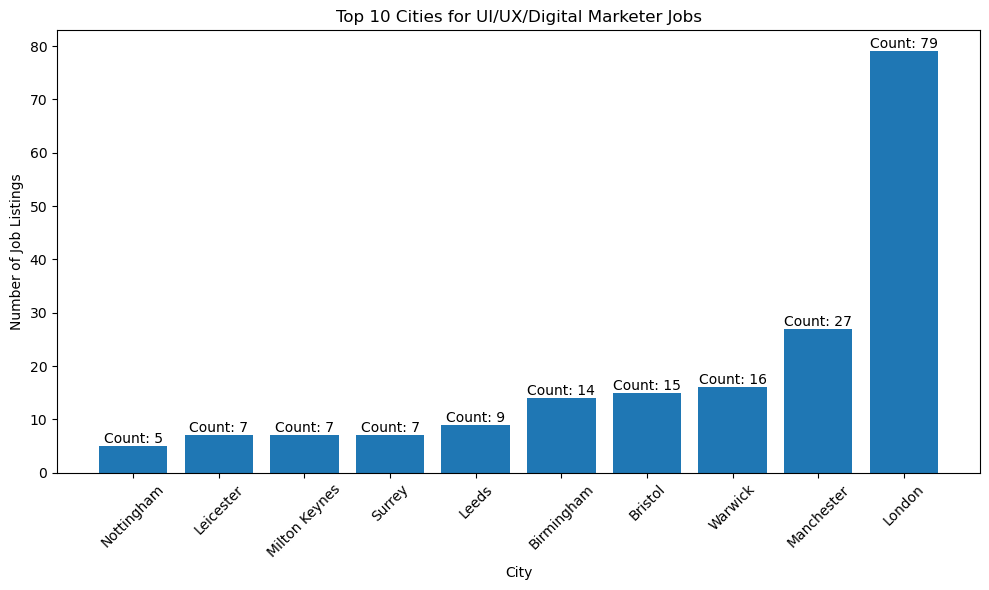

In [40]:
# Sort the data within each job title group by count in ascending order
top_cities_by_job_title = top_cities_by_job_title.sort_values(by=['Job_Title_New', 'Count'], ascending=[True, True])

for job_title, data in top_cities_by_job_title.groupby('Job_Title_New'):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(data['job_city'], data['Count'])
    plt.title(f'Top 10 Cities for {job_title} Jobs')
    plt.xlabel('City')
    plt.ylabel('Number of Job Listings')
    plt.xticks(rotation=45)
    
    # Add tooltips to the bars
    for bar, count, city in zip(bars, data['Count'], data['job_city']):
        plt.annotate(f'Count: {count}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()


#### Insight
- The charts show that London has the highest demand for all job titles

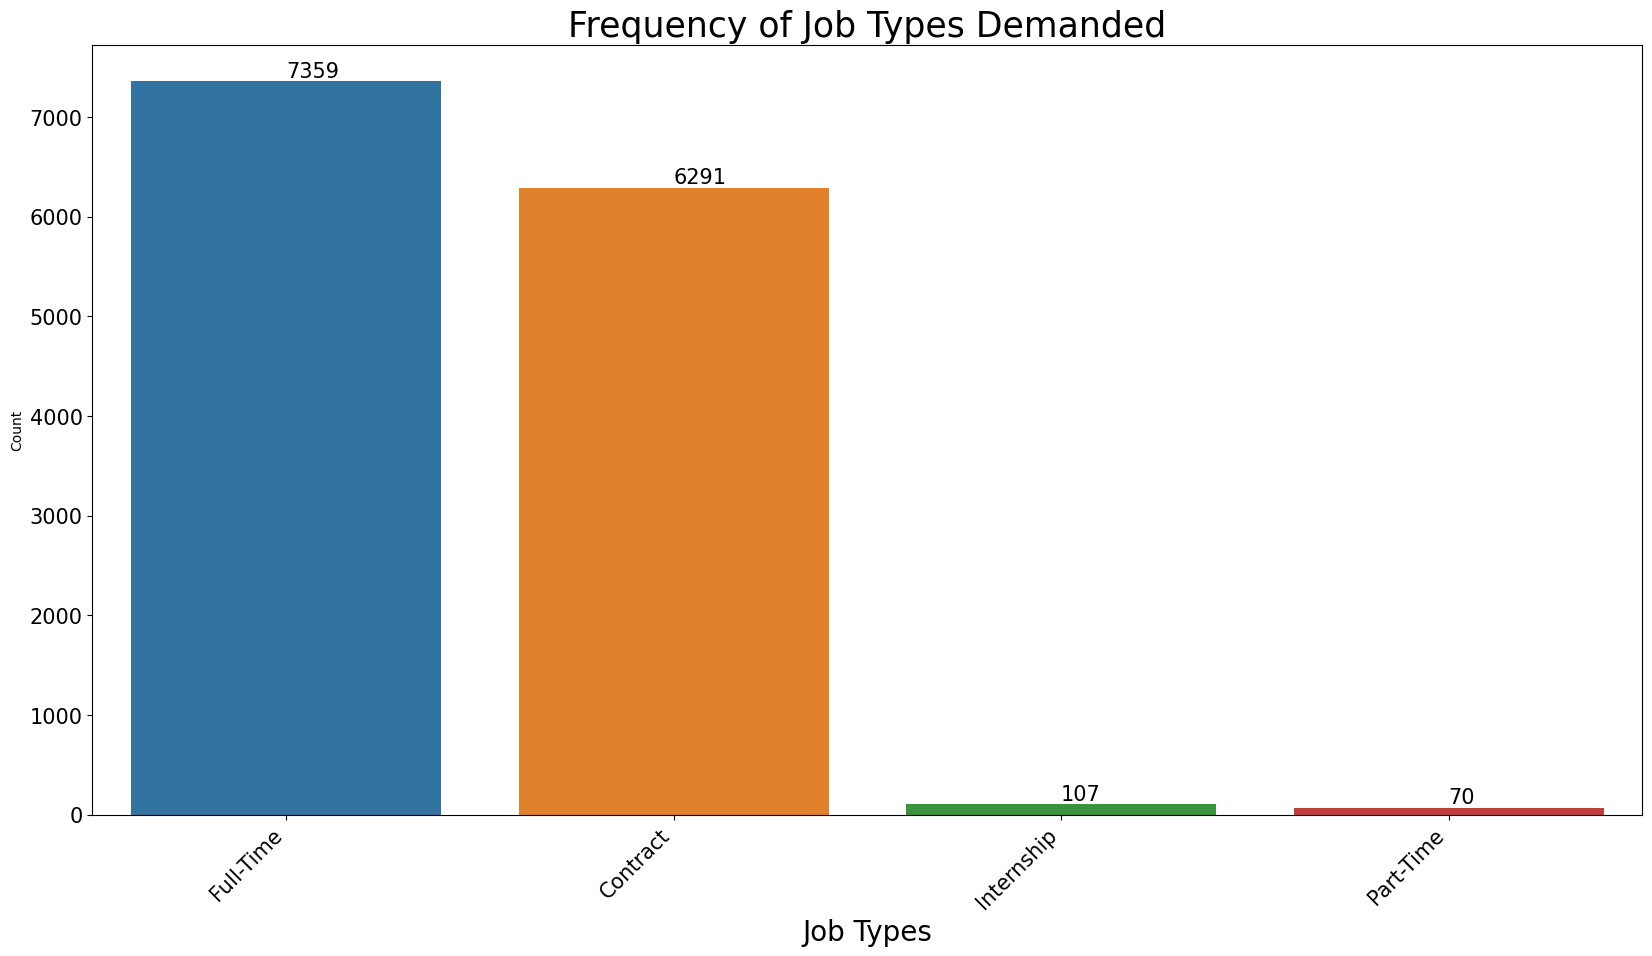

In [41]:
# Calculate the least 10 counts of the job city
job_type = merged_df['job_type'].value_counts().head(11)

# Create a DataFrame with the top 10 categories and their counts
jobtype = pd.DataFrame({'job_type': job_type.index, 'Count': job_type.values})

# Plot the countplot using seaborn
plt.figure(figsize=(20,10))
sns.barplot(data=jobtype, x='job_type', y='Count')
plt.xlabel("Job Types", size =20 )
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.ylabel('Count')
plt.yticks(fontsize=15)
plt.title("Frequency of Job Types Demanded", size=25)

# Add tooltips to the bars
for i, count in enumerate(jobtype['Count']):
    plt.text(i, count, str(count), va='bottom', fontsize=15)

plt.show()

#### Insight
- Companies accross UK request for tech jobs who will work on Full-Time basis (7,359 demands) and on contract basis (6,291 demands) while Part-Time has the least demand (70).

In [42]:

# Create unique lists of job titles and job types
job_titles = df['Job_Title_New'].unique()
job_types = df['job_type'].unique()

# Create a random flow matrix (values represent the flow between job titles and job types)
flow_matrix = [[random.randint(1, 10) for _ in range(len(job_types))] for _ in range(len(job_titles))]

# Create a Sankey chart
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=job_titles.tolist() + job_types.tolist()
    ),
    link=dict(
        source=[i for i in range(len(job_titles)) for _ in range(len(job_types))],
        target=[j + len(job_titles) for i in range(len(job_titles)) for j in range(len(job_types))],
        value=sum(flow_matrix, []),
        color=[f'rgba({random.randint(0, 255)}, {random.randint(0, 255)}, {random.randint(0, 255)}, 0.7)' for _ in range(len(job_titles) * len(job_types))]
    )
))

# Customize the layout
fig.update_layout(title_text="Chart Showing Job Titles And The Job Types Available")

# Show the chart
fig.show()


#### Insights
- All job title has openings to work on full-time, part-time, contract and intern basis.

In [43]:
# Group the data by job title and calculate the average salary
average_salary_per_job_city = merged_df.groupby('job_city')['Salaries'].mean().reset_index().head(10)

# Sort the data by average salary in ascending order
average_salary_per_job_city = average_salary_per_job_city.sort_values(by='Salaries', ascending=True)

# Create an interactive bar chart with tooltips using Plotly Express
fig = px.bar(average_salary_per_job_city, x='job_city', y='Salaries', text='Salaries', color='job_city',
             title='Top 10 Cities with the Average Salary',
             labels={'job_city': 'Job City', 'Salaries': 'Average Salary'})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')  # Format tooltip text

# Customize the appearance of the chart
fig.update_layout(xaxis_tickangle=-45, xaxis_title='City', yaxis_title='Average Salary')
fig.show()


#### Insight
- Abingdon has the highest average salary paid to tech job  followed by Aylesbury and Aldershot.

In [44]:
# Group the data by job title and calculate the average salary
average_salary_per_job_type = merged_df.groupby('job_type')['Salaries'].mean().reset_index()

# Sort the data by average salary in ascending order
average_salary_per_job_type = average_salary_per_job_type.sort_values(by='Salaries', ascending=False)

# Create an interactive bar chart with tooltips using Plotly Express
fig = px.bar(average_salary_per_job_type, x='job_type', y='Salaries', text='Salaries', color='job_type',
             title='Average Salary Per Job Type', labels={'job_type': 'Job Type', 'Salaries': 'Average Salary'})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')  # Format tooltip text

# Customize the appearance of the chart
fig.update_layout(xaxis_tickangle=-45, xaxis_title=None, yaxis_title='Average Salary')
fig.show()


#### Insight
- Contract job type get the highest average salary, while intern get the least average salary.

In [45]:
# Group the data by job title and calculate the average salary
average_salary_per_job = merged_df.groupby('Job_Title_New')['Salaries'].mean().reset_index()

# Sort the data by average salary in ascending order
average_salary_per_job = average_salary_per_job.sort_values(by='Salaries', ascending=True)

# Create an interactive bar chart with tooltips using Plotly Express
fig = px.bar(average_salary_per_job, x='Job_Title_New', y='Salaries', text='Salaries', color='Job_Title_New',
             title='Average Salary Per Job Title', labels={'Job_Title_New': 'Job Title', 'Salaries': 'Average Salary'})

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')  # Format tooltip text


#### Insight
- Cloud engineers on the average gets the highest salary (59,000 pounds), followed by Team lead and Data scientist (55,000 pounds).
- Devops Programmer gets the least average salary amongst the job titles.

## Natural Language Processing

### Analyzing The Job Description Associated To Each of the Job Titles

In [46]:
# Download the NLTK stopwords data (if you haven't already)
nltk.download('stopwords')

# Get the set of English stopwords
stop_words = set(stopwords.words('english'))

# Now you can use the 'stop_words' set in your code
stop_words

[nltk_data] Downloading package stopwords to C:\Users\HP ELITEBOOK
[nltk_data]     1040\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [47]:
# Convert non-string elements to empty strings and tokenize
tokenized_descriptions = [word_tokenize(str(description)) for description in merged_df['job_description']]

In [48]:
# Create a new DataFrame containing only the 'job_description' and job title column
job_description_df = merged_df[['Job_Title_New','job_description']]

# Now, 'job_description_df' is a DataFrame containing only the 'job_description' column
print(job_description_df.head())

              Job_Title_New                                    job_description
0        Software/Developer  If you are looking to join a high tech industr...
1        Software/Developer  If you are looking to join a high tech industr...
2        Software/Developer  Lead C++ Games Developer | AAA Games | 90k | M...
3  Cyber Security/IT Expert  Location: We operate a  working model and full...
4              Data Analyst                                                NaN


## Analyzing The Most Common Words Associated With Software/Developer

In [49]:
# Create a new DataFrame containing only the rows where 'Job_Title_New' meets a specific criteria
criteria = 'Software/Developer'  # Replace 'your_criteria_here' with your specific criteria

# Use boolean indexing to select rows that meet the criteria
software_df = job_description_df[job_description_df['Job_Title_New'] == criteria]

# Assuming your job descriptions are in a column named 'job_description'
job_descriptions_software = software_df['job_description']

# Initialize a list to store tokenized and cleaned descriptions
cleaned_descriptions = []

# Tokenization, Text Cleaning, and Stopword Removal
for description in job_descriptions_software:
    if isinstance(description, str):  # Check if the description is a string (not NaN)
        tokens = word_tokenize(description.lower())  # Tokenization and convert to lowercase
        # Remove stopwords and non-alphabetic characters
        filtered_tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
        cleaned_descriptions.extend(filtered_tokens)

# Count Word Frequencies
word_freq = Counter(cleaned_descriptions)

# Print the most common words and their frequencies
print("Most common words and their frequencies For Software/Developer:")
for word, freq in word_freq.most_common(10):  # Change 10 to the desired number of top words
    print(f"{word}: {freq}")

Most common words and their frequencies For Software/Developer:
software: 14837
experience: 11314
development: 9434
working: 8801
team: 7879
work: 7809
developer: 7541
role: 7184
skills: 4535
business: 4416


## Analyzing Words Associated With Cyber Security

In [50]:
# Create a new DataFrame containing only the rows where 'Job_Title_New' meets a specific criteria
criteria = 'Cyber Security/IT Expert'  # Replace 'your_criteria_here' with your specific criteria

# Use boolean indexing to select rows that meet the criteria
cyber_df = job_description_df[job_description_df['Job_Title_New'] == criteria]

# Assuming your job descriptions are in a column named 'job_description'
job_descriptions_cyber = cyber_df['job_description']

# Initialize a list to store tokenized and cleaned descriptions
cleaned_descriptions = []

# Tokenization, Text Cleaning, and Stopword Removal
for description in job_descriptions_cyber:
    if isinstance(description, str):  # Check if the description is a string (not NaN)
        tokens = word_tokenize(description.lower())  # Tokenization and convert to lowercase
        # Remove stopwords and non-alphabetic characters
        filtered_tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
        cleaned_descriptions.extend(filtered_tokens)

# Count Word Frequencies
word_freq = Counter(cleaned_descriptions)

# Print the most common words and their frequencies
print("Most common words and their frequencies For Cyber Security:")
for word, freq in word_freq.most_common(10):  # Change 10 to the desired number of top words
    print(f"{word}: {freq}")

Most common words and their frequencies For Cyber Security:
security: 1809
experience: 1325
project: 1106
business: 1103
role: 977
cloud: 970
data: 840
manager: 834
architect: 790
team: 783


## Analyzing Words Associated With Data Analyst

In [51]:
# Create a new DataFrame containing only the rows where 'Job_Title_New' meets a specific criteria
criteria = 'Data Analyst'  # Replace 'your_criteria_here' with your specific criteria

# Use boolean indexing to select rows that meet the criteria
DA_df = job_description_df[job_description_df['Job_Title_New'] == criteria]

# Assuming your job descriptions are in a column named 'job_description'
job_descriptions_DA = DA_df['job_description']

# Initialize a list to store tokenized and cleaned descriptions
cleaned_descriptions = []

# Tokenization, Text Cleaning, and Stopword Removal
for description in job_descriptions_DA:
    if isinstance(description, str):  # Check if the description is a string (not NaN)
        tokens = word_tokenize(description.lower())  # Tokenization and convert to lowercase
        # Remove stopwords and non-alphabetic characters
        filtered_tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
        cleaned_descriptions.extend(filtered_tokens)

# Count Word Frequencies
word_freq = Counter(cleaned_descriptions)

# Print the most common words and their frequencies
print("Most common words and their frequencies For Data Analysts:")
for word, freq in word_freq.most_common(10):  # Change 10 to the desired number of top words
    print(f"{word}: {freq}")

Most common words and their frequencies For Data Analysts:
data: 13959
business: 10952
analyst: 8051
experience: 6933
role: 6819
working: 6199
work: 6040
team: 5590
support: 4934
skills: 4067


## Analyzing Words Associated With Devops Programmer

In [52]:
# Create a new DataFrame containing only the rows where 'Job_Title_New' meets a specific criteria
criteria = 'Devops Programmer'  # Replace 'your_criteria_here' with your specific criteria

# Use boolean indexing to select rows that meet the criteria
dev_df = job_description_df[job_description_df['Job_Title_New'] == criteria]

# Assuming your job descriptions are in a column named 'job_description'
job_descriptions_dev = dev_df['job_description']

# Initialize a list to store tokenized and cleaned descriptions
cleaned_descriptions = []

# Tokenization, Text Cleaning, and Stopword Removal
for description in job_descriptions_dev:
    if isinstance(description, str):  # Check if the description is a string (not NaN)
        tokens = word_tokenize(description.lower())  # Tokenization and convert to lowercase
        # Remove stopwords and non-alphabetic characters
        filtered_tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
        cleaned_descriptions.extend(filtered_tokens)

# Count Word Frequencies
word_freq = Counter(cleaned_descriptions)

# Print the most common words and their frequencies
print("Most common words and their frequencies For Devops:")
for word, freq in word_freq.most_common(10):  # Change 10 to the desired number of top words
    print(f"{word}: {freq}")

Most common words and their frequencies For Devops:
devops: 1305
work: 905
engineer: 788
role: 740
experience: 733
team: 702
development: 695
security: 695
people: 489
solutions: 475


## Analyzing Words Associated With Senior/vp/team lead

In [53]:
# Create a new DataFrame containing only the rows where 'Job_Title_New' meets a specific criteria
criteria = 'Senior/vp/team lead'  # Replace 'your_criteria_here' with your specific criteria

# Use boolean indexing to select rows that meet the criteria
svt_df = job_description_df[job_description_df['Job_Title_New'] == criteria]

# Assuming your job descriptions are in a column named 'job_description'
job_descriptions_svt = svt_df['job_description']

# Initialize a list to store tokenized and cleaned descriptions
cleaned_descriptions = []

# Tokenization, Text Cleaning, and Stopword Removal
for description in job_descriptions_svt:
    if isinstance(description, str):  # Check if the description is a string (not NaN)
        tokens = word_tokenize(description.lower())  # Tokenization and convert to lowercase
        # Remove stopwords and non-alphabetic characters
        filtered_tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
        cleaned_descriptions.extend(filtered_tokens)

# Count Word Frequencies
word_freq = Counter(cleaned_descriptions)

# Print the most common words and their frequencies
print("Most common words and their frequencies For Lead:")
for word, freq in word_freq.most_common(10):  # Change 10 to the desired number of top words
    print(f"{word}: {freq}")

Most common words and their frequencies For Lead:
data: 2707
experience: 2206
business: 2117
role: 1740
team: 1615
project: 1463
working: 1437
work: 1409
senior: 1324
projects: 1171


## Analyzing Words Associated With Data Scientist

In [54]:
# Create a new DataFrame containing only the rows where 'Job_Title_New' meets a specific criteria
criteria = 'Data Scientist'  # Replace 'your_criteria_here' with your specific criteria

# Use boolean indexing to select rows that meet the criteria
DS_df = job_description_df[job_description_df['Job_Title_New'] == criteria]

# Assuming your job descriptions are in a column named 'job_description'
job_descriptions_DS = DS_df['job_description']

# Initialize a list to store tokenized and cleaned descriptions
cleaned_descriptions = []

# Tokenization, Text Cleaning, and Stopword Removal
for description in job_descriptions_DS:
    if isinstance(description, str):  # Check if the description is a string (not NaN)
        tokens = word_tokenize(description.lower())  # Tokenization and convert to lowercase
        # Remove stopwords and non-alphabetic characters
        filtered_tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
        cleaned_descriptions.extend(filtered_tokens)

# Count Word Frequencies
word_freq = Counter(cleaned_descriptions)

# Print the most common words and their frequencies
print("Most common words and their frequencies For Data Scientists:")
for word, freq in word_freq.most_common(10):  # Change 10 to the desired number of top words
    print(f"{word}: {freq}")

Most common words and their frequencies For Data Scientists:
data: 559
experience: 242
business: 151
within: 121
science: 112
insights: 100
using: 92
team: 92
knowledge: 90
scientist: 86


## Analyzing Words Associated With UI/UX/Digital Marketer

In [55]:
# Create a new DataFrame containing only the rows where 'Job_Title_New' meets a specific criteria
criteria = 'UI/UX/Digital Marketer'  # Replace 'your_criteria_here' with your specific criteria

# Use boolean indexing to select rows that meet the criteria
UI_df = job_description_df[job_description_df['Job_Title_New'] == criteria]

# Assuming your job descriptions are in a column named 'job_description'
job_descriptions_UI = UI_df['job_description']

# Initialize a list to store tokenized and cleaned descriptions
cleaned_descriptions = []

# Tokenization, Text Cleaning, and Stopword Removal
for description in job_descriptions_UI:
    if isinstance(description, str):  # Check if the description is a string (not NaN)
        tokens = word_tokenize(description.lower())  # Tokenization and convert to lowercase
        # Remove stopwords and non-alphabetic characters
        filtered_tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
        cleaned_descriptions.extend(filtered_tokens)

# Count Word Frequencies
word_freq = Counter(cleaned_descriptions)

# Print the most common words and their frequencies
print("Most common words and their frequencies For Data UI/UX:")
for word, freq in word_freq.most_common(10):  # Change 10 to the desired number of top words
    print(f"{word}: {freq}")

Most common words and their frequencies For Data UI/UX:
digital: 315
project: 258
experience: 244
manager: 236
projects: 223
security: 204
team: 192
working: 187
design: 180
role: 171


## Analyzing Words Associated With Data Engineering

In [56]:
# Create a new DataFrame containing only the rows where 'Job_Title_New' meets a specific criteria
criteria = 'Data Engineering'  # Replace 'your_criteria_here' with your specific criteria

# Use boolean indexing to select rows that meet the criteria
DE_df = job_description_df[job_description_df['Job_Title_New'] == criteria]

# Assuming your job descriptions are in a column named 'job_description'
job_descriptions_DE = DE_df['job_description']

# Initialize a list to store tokenized and cleaned descriptions
cleaned_descriptions = []

# Tokenization, Text Cleaning, and Stopword Removal
for description in job_descriptions_DE:
    if isinstance(description, str):  # Check if the description is a string (not NaN)
        tokens = word_tokenize(description.lower())  # Tokenization and convert to lowercase
        # Remove stopwords and non-alphabetic characters
        filtered_tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
        cleaned_descriptions.extend(filtered_tokens)

# Count Word Frequencies
word_freq = Counter(cleaned_descriptions)

# Print the most common words and their frequencies
print("Most common words and their frequencies For Data Engineer:")
for word, freq in word_freq.most_common(10):  # Change 10 to the desired number of top words
    print(f"{word}: {freq}")

Most common words and their frequencies For Data Engineer:
data: 1574
experience: 353
engineer: 308
working: 260
business: 252
role: 252
work: 219
team: 214
engineering: 161
support: 139


## Analyzing Words Associated With Junior/Intern

In [57]:
# Create a new DataFrame containing only the rows where 'Job_Title_New' meets a specific criteria
criteria = 'Junior/Intern'  # Replace 'your_criteria_here' with your specific criteria

# Use boolean indexing to select rows that meet the criteria
JI_df = job_description_df[job_description_df['Job_Title_New'] == criteria]

# Now, 'filtered_df' is a DataFrame containing only rows where 'Job_Title_New' matches the specific criteria
#print(JI_df.head())

# Assuming your job descriptions are in a column named 'job_description'
job_descriptions_JI = JI_df['job_description']

# Initialize a list to store tokenized and cleaned descriptions
cleaned_descriptions = []

# Tokenization, Text Cleaning, and Stopword Removal
for description in job_descriptions_JI:
    if isinstance(description, str):  # Check if the description is a string (not NaN)
        tokens = word_tokenize(description.lower())  # Tokenization and convert to lowercase
        # Remove stopwords and non-alphabetic characters
        filtered_tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
        cleaned_descriptions.extend(filtered_tokens)

# Count Word Frequencies
word_freq = Counter(cleaned_descriptions)

# Print the most common words and their frequencies
print("Most common words and their frequencies For Intern:")
for word, freq in word_freq.most_common(10):  # Change 10 to the desired number of top words
    print(f"{word}: {freq}")

Most common words and their frequencies For Intern:
project: 255
manager: 144
junior: 134
team: 124
projects: 115
role: 113
data: 103
engineer: 90
sales: 87
product: 87


## Analyzing Words Associated With Business Analyst

In [58]:
# Create a new DataFrame containing only the rows where 'Job_Title_New' meets a specific criteria
criteria = 'Business Analyst'  # Replace 'your_criteria_here' with your specific criteria

# Use boolean indexing to select rows that meet the criteria
BA_df = job_description_df[job_description_df['Job_Title_New'] == criteria]

# Now, 'filtered_df' is a DataFrame containing only rows where 'Job_Title_New' matches the specific criteria
#print(JI_df.head())

# Assuming your job descriptions are in a column named 'job_description'
job_descriptions_BA = BA_df['job_description']

# Initialize a list to store tokenized and cleaned descriptions
cleaned_descriptions = []

# Tokenization, Text Cleaning, and Stopword Removal
for description in job_descriptions_BA:
    if isinstance(description, str):  # Check if the description is a string (not NaN)
        tokens = word_tokenize(description.lower())  # Tokenization and convert to lowercase
        # Remove stopwords and non-alphabetic characters
        filtered_tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
        cleaned_descriptions.extend(filtered_tokens)

# Count Word Frequencies
word_freq = Counter(cleaned_descriptions)

# Print the most common words and their frequencies
print("Most common words and their frequencies For Business Analyst:")
for word, freq in word_freq.most_common(10):  # Change 10 to the desired number of top words
    print(f"{word}: {freq}")

Most common words and their frequencies For Business Analyst:
project: 2383
manager: 1259
projects: 1134
experience: 538
management: 452
team: 449
business: 411
delivery: 358
within: 328
working: 328


## Analyzing Words Associated With Cloud Engineer

In [59]:
# Create a new DataFrame containing only the rows where 'Job_Title_New' meets a specific criteria
criteria = 'Cloud Engineer'  # Replace 'your_criteria_here' with your specific criteria

# Use boolean indexing to select rows that meet the criteria
CE_df = job_description_df[job_description_df['Job_Title_New'] == criteria]

# Now, 'filtered_df' is a DataFrame containing only rows where 'Job_Title_New' matches the specific criteria
#print(JI_df.head())

# Assuming your job descriptions are in a column named 'job_description'
job_descriptions_CE = CE_df['job_description']

# Initialize a list to store tokenized and cleaned descriptions
cleaned_descriptions = []

# Tokenization, Text Cleaning, and Stopword Removal
for description in job_descriptions_CE:
    if isinstance(description, str):  # Check if the description is a string (not NaN)
        tokens = word_tokenize(description.lower())  # Tokenization and convert to lowercase
        # Remove stopwords and non-alphabetic characters
        filtered_tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
        cleaned_descriptions.extend(filtered_tokens)

# Count Word Frequencies
word_freq = Counter(cleaned_descriptions)

# Print the most common words and their frequencies
print("Most common words and their frequencies For Cloud Engineers:")
for word, freq in word_freq.most_common(10):  # Change 10 to the desired number of top words
    print(f"{word}: {freq}")

Most common words and their frequencies For Cloud Engineers:
data: 352
azure: 272
experience: 247
cloud: 191
engineer: 184
business: 183
role: 181
change: 165
infrastructure: 155
manager: 124


## Analyzing Words Associated With Sales Engineer/Testers

In [60]:
# Create a new DataFrame containing only the rows where 'Job_Title_New' meets a specific criteria
criteria = 'Sales Engineer/Testers'

# Use boolean indexing to select rows that meet the criteria
set_df = job_description_df[job_description_df['Job_Title_New'] == criteria]

#print(JI_df.head())

# Assuming your job descriptions are in a column named 'job_description'
job_descriptions_set = set_df['job_description']

# Initialize a list to store tokenized and cleaned descriptions
cleaned_descriptions = []

# Tokenization, Text Cleaning, and Stopword Removal
for description in job_descriptions_set:
    if isinstance(description, str):  # Check if the description is a string (not NaN)
        tokens = word_tokenize(description.lower())  # Tokenization and convert to lowercase
        # Remove stopwords and non-alphabetic characters
        filtered_tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
        cleaned_descriptions.extend(filtered_tokens)

# Count Word Frequencies
word_freq = Counter(cleaned_descriptions)

# Print the most common words and their frequencies
print("Most common words and their frequencies For Sales Engineer:")
for word, freq in word_freq.most_common(10):  # Change 10 to the desired number of top words
    print(f"{word}: {freq}")

Most common words and their frequencies For Sales Engineer:
sales: 48
engineer: 33
technical: 15
manager: 12
company: 11
engineering: 8
management: 7
project: 6
join: 5
role: 5


In [61]:
# run the profile report for the updated dataset
profile1 = merged_df.profile_report(title='Pandas Profiling Report')

# save the report as html file
profile1.to_file(output_file="pandas_profiling1.html")

profile1

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Key Insights from the Analysis:

1. **Analysis Scope**: The analysis encompasses several key aspects of tech jobs in the UK, including job types, job descriptions, job titles, salaries, job cities, and job sites.

    a. **Job Descriptions**: Job descriptions provide detailed information about the tasks and responsibilities associated with each job. This information is crucial for job seekers to understand the nature of the role.

    b. **Job Types**: Job types categorize positions based on their employment status, including Temporary, Full-Time, Part-Time, and Contract roles, offering clarity to job seekers.

    c. **Job Titles**: Job titles categorize various tech jobs in the UK market, with 12 unique categories providing structure for role classification.

    d. **Salary Information**: Salary data is essential for both job seekers and employers, helping them gauge alignment with financial expectations and competitiveness in talent acquisition.

    e. **Job Cities**: Geographic distribution of tech jobs is vital, with London standing out as the city with the highest demand for tech jobs, likely due to its status as the UK's economic capital.

    f. **Job Sites**: Job sites play a crucial role in connecting job seekers with employers, with Simplyhired being the most frequently used, followed by totaljobs and cv-library.

2. **Top Job Titles**: The top three job titles in demand in the UK's tech job market are software developers, data analysts, and team leads.

3. **Top Company Demand**: Harnham, a data analysis and machine learning company, exhibits the highest demand for tech jobs in the UK. Oscar Associates and Noir also have significant demand for tech talent.

4. **Regional Job Demand**: Except for Sales Engineers, where York and Milton Keynes have higher demand, London dominates the demand for the analyzed job titles, likely due to its economic prominence.

5. **Job Type Demand**: Full-Time positions are the most demanded by recruiters and employers across the UK, followed by Contract workers, while part-time workers are in less demand.

6. **Salary Disparities**: The top 10 cities with the highest tech job demand do not align with the top 10 cities offering the highest average salaries to tech job seekers. Abingdon stands out as the town with the highest average salary of £60,000 for tech job seekers.

7. **Highest-Paid Role**: Cloud engineers in the UK receive the highest average salary, earning £59,000 annually.

8. **Contract and Part-Time Roles**: Contractors and part-timers earn the highest average salary of £42,000 in the UK.

These insights provide a comprehensive understanding of the UK tech job market, assisting both job seekers and employers in making informed decisions and optimizing job matching.